In [415]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re
plt.style.use('default')

In [416]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [417]:
df = pd.read_csv('mg_eda_univariate_analysis_dataset.csv')

In [418]:
df.head()

id  \
0  cardid69429251   
1  cardid69427147   
2  cardid71764335   
3  cardid71631505   
4  cardid72558997   

                                                                                                                                            url  \
0      https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   
1   https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437   
2     https://www.magicbricks.com/propertydetails/2-bhk-623-sq-ft-multistorey-apartment-for-sale-dahisar-east-in-mumbai&id=4d423731373634333335   
3  https://www.magicbricks.com/propertydetails/2-bhk-702-sq-ft-multistorey-apartment-for-sale-jogeshwari-east-in-mumbai&id=4d423731363331353035   
4          https://www.magicbricks.com/propertydetails/1-bhk-608-sq-ft-multistorey-apartment-for-sale-govandi-in-mumbai&id=4d423732353538393937   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   
1                    https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg   
2                 https://img.staticmb.com/mbimages/project/photo_h310_w462/2021/11/30/project-photo-4-northern-hills-mumbai-5233377_600_800_310_462.jpg   
3             https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/02/29/project-photo-13-avant-heritage-v-mumbai-5419271_899_1600_310_462.jpg   
4                      https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/05/10/project-photo-5-centrionx-mumbai-5420523_533_800_310_462.jpg   

                                                    address  \
0                          pokhran road, thane, maharashtra   
1  kharghar, navi mumbai - central navi mumbai, maharashtra   
2        dahisar east, mumbai - western mumbai, maharashtra   
3     jogeshwari east, mumbai - western mumbai, maharashtra   
4               govandi, mumbai - harbour line, maharashtra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# price with categorical columns 

# construction

In [419]:
df['construction'].value_counts()

construction
under construction    4558
less than 5 years     1508
new construction      1467
5 to 10 years         1405
10 to 15 years         944
above 20 years         495
15 to 20 years         458
Name: count, dtype: int64

In [420]:
import pandas as pd

# Define custom construction order
construction_order = [
    'under construction', 
    'new construction', 
    'less than 5 years', 
    '5 to 10 years', 
    '10 to 15 years', 
    '15 to 20 years', 
    'above 20 years'
]

# Set the 'construction' column to have the custom order
df['construction'] = pd.Categorical(df['construction'], categories=construction_order, ordered=True)


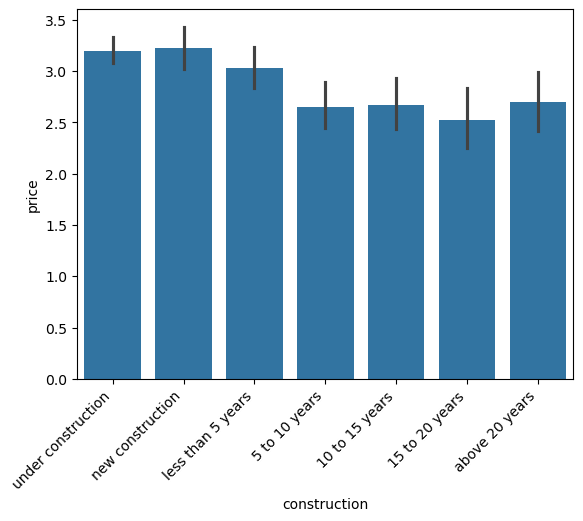

In [421]:
# using price mean 
sns.barplot(data=df, x='construction', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [422]:
# Create a pivot table to show the average price for each construction category
pivot_table = df.pivot_table(values='price', index='construction', aggfunc='mean')

# Display the pivot table
print(pivot_table)


                       price
construction                
under construction  3.195886
new construction    3.225502
less than 5 years   3.031840
5 to 10 years       2.650215
10 to 15 years      2.674185
15 to 20 years      2.525795
above 20 years      2.696503


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\4219599046.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', aggfunc='mean')


### observation 

- The mean price of properties less than 5 years old is higher than that of properties older than 5 years.  
- The mean price of properties less than 5 years old ranges from 3 to 3.22 crores.  
- The mean price of properties older than 5 years ranges from 2.52 to 2.69 crores.  
- The mean price of under-construction and newly constructed properties is almost the same.  
- Properties older than 20 years have a higher mean price than those 15–20 years old, which seems unfair.  

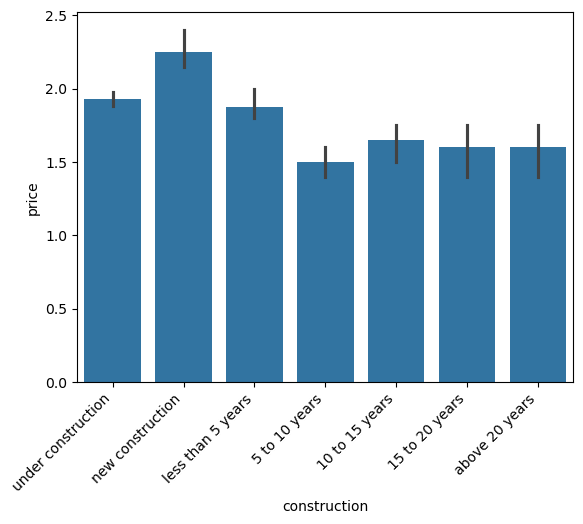

In [423]:
#using price median 
sns.barplot(data=df, x='construction', y='price',estimator = np.median)
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [424]:
# Create a pivot table to show the average price for each construction category
pivot_table = df.pivot_table(values='price', index='construction', aggfunc='median')

# Display the pivot table
print(pivot_table)


                    price
construction             
under construction  1.930
new construction    2.250
less than 5 years   1.875
5 to 10 years       1.500
10 to 15 years      1.650
15 to 20 years      1.600
above 20 years      1.600


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\2171633726.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', aggfunc='median')


### observations  

- Newly constructed properties have the highest median price.  
- The median price of all other properties aligns with their respective age categories.  

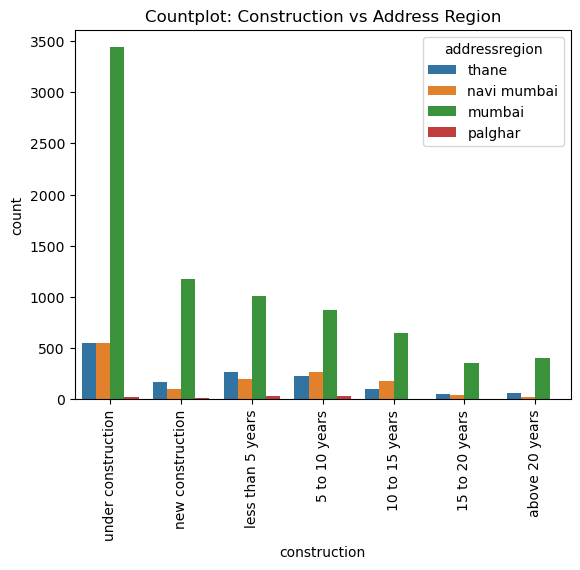

In [425]:
sns.countplot(x='construction', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Countplot: Construction vs Address Region")
plt.show()

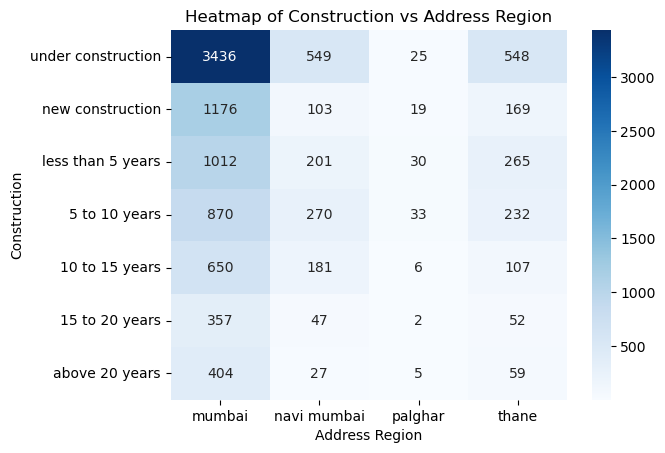

In [426]:
# Create a crosstab
cross_tab = pd.crosstab(df['construction'], df['addressregion'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Construction vs Address Region")
plt.xlabel("Address Region")
plt.ylabel("Construction")
plt.show()

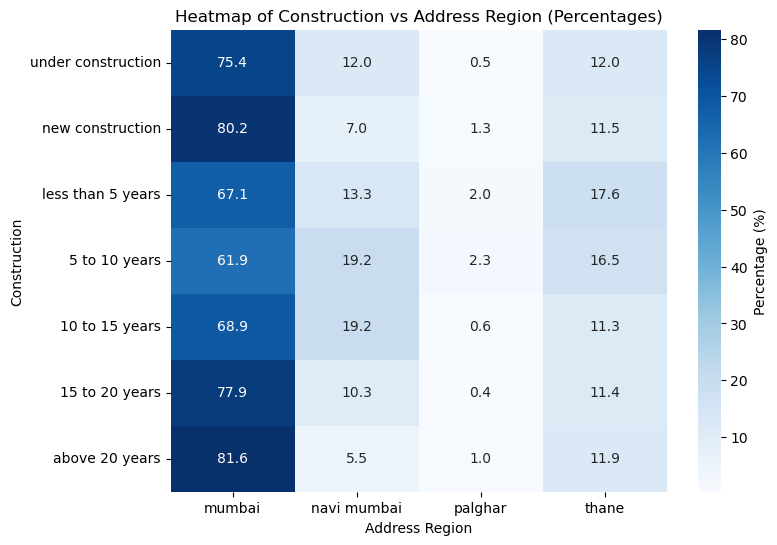

In [427]:
# Create a crosstab of counts
cross_tab = pd.crosstab(df['construction'], df['addressregion'])

# Normalize the crosstab to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot heatmap with percentages
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(cross_tab_percentage, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title("Heatmap of Construction vs Address Region (Percentages)")
plt.xlabel("Address Region")
plt.ylabel("Construction")
plt.show()

### observation 
- The highest number of properties across all construction ages are found in the following order: Mumbai > Thane & Navi Mumbai > Palghar.

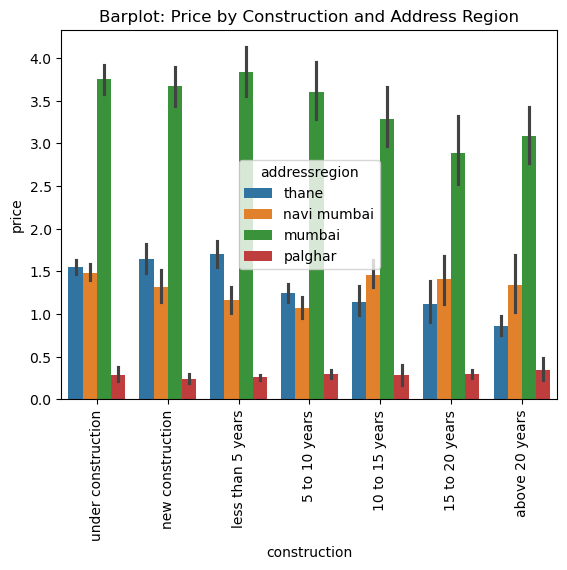

In [428]:
sns.barplot(x='construction', y='price', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean price for less than 10 year age of properties follows this trend : Mumbai > Thane > Navi Mumbai > Palghar
- mean price for older than 10 year age of properties follows this trend : Mumbai > Navi Mumbai > Thane > Palghar
- above 15 year old properties are less expensive compare to other age of contruction for mumbai region

In [429]:
# Create a pivot table to show the average price for each combination of construction category and address region
pivot_table = df.pivot_table(values='price', index='construction', columns='addressregion', aggfunc='mean')

# Display the pivot table
print(pivot_table)


addressregion         mumbai  navi mumbai   palghar     thane
construction                                                 
under construction  3.752372     1.484982  0.290400  1.553250
new construction    3.667692     1.317854  0.237947  1.647012
less than 5 years   3.832409     1.165493  0.259733  1.704000
5 to 10 years       3.602953     1.074304  0.299636  1.245832
10 to 15 years      3.286214     1.459000  0.286000  1.145766
15 to 20 years      2.889969     1.407872  0.295000  1.121827
above 20 years      3.084960     1.337037  0.345000  0.857966


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\3495475031.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', columns='addressregion', aggfunc='mean')


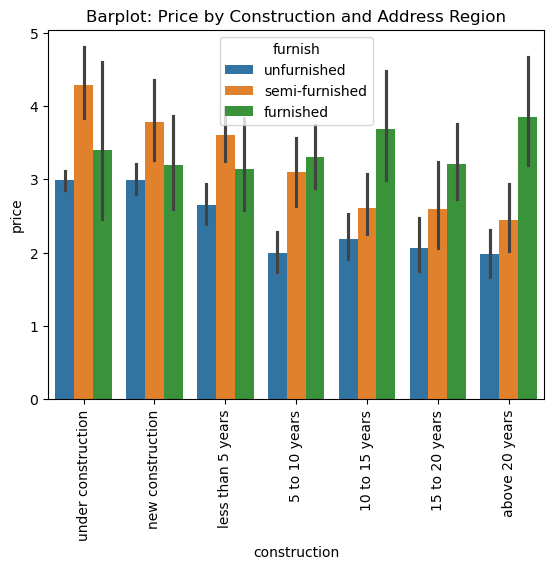

In [430]:
sns.barplot(x='construction', y='price', hue='furnish', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

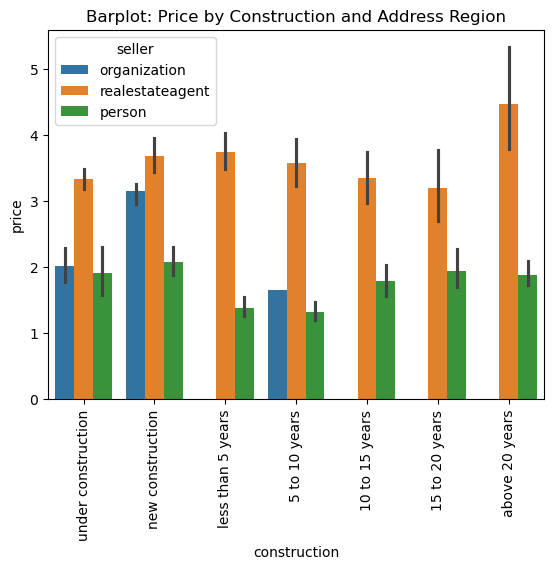

In [431]:
sns.barplot(x='construction', y='price', hue='seller', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation 
- Sellers who list properties across all construction ages follow this price hierarchy: Real Estate Agent > Organization > person. This means that when a property is sold through a real estate agent, its price is generally higher whether they are newly constructed or old.
- 

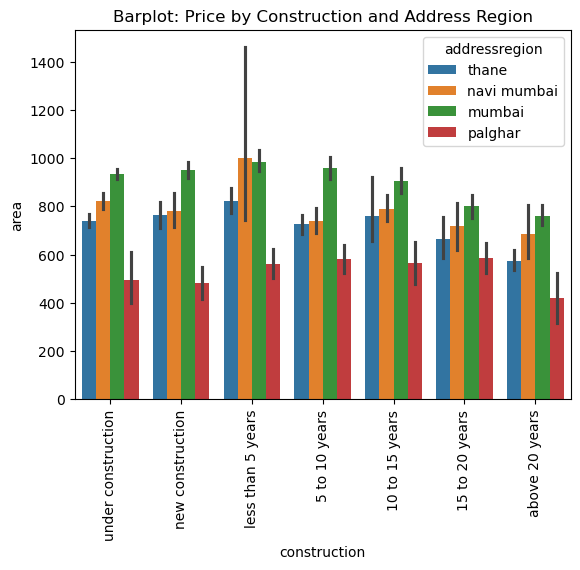

In [432]:
sns.barplot(x='construction', y='area', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observattion 
- The mean area of properties across all construction ages follows the trend: Mumbai > Navi Mumbai >Thane > Palghar.

C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\778103997.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values=['price', 'area'], index='construction', columns='addressregion', aggfunc='mean')


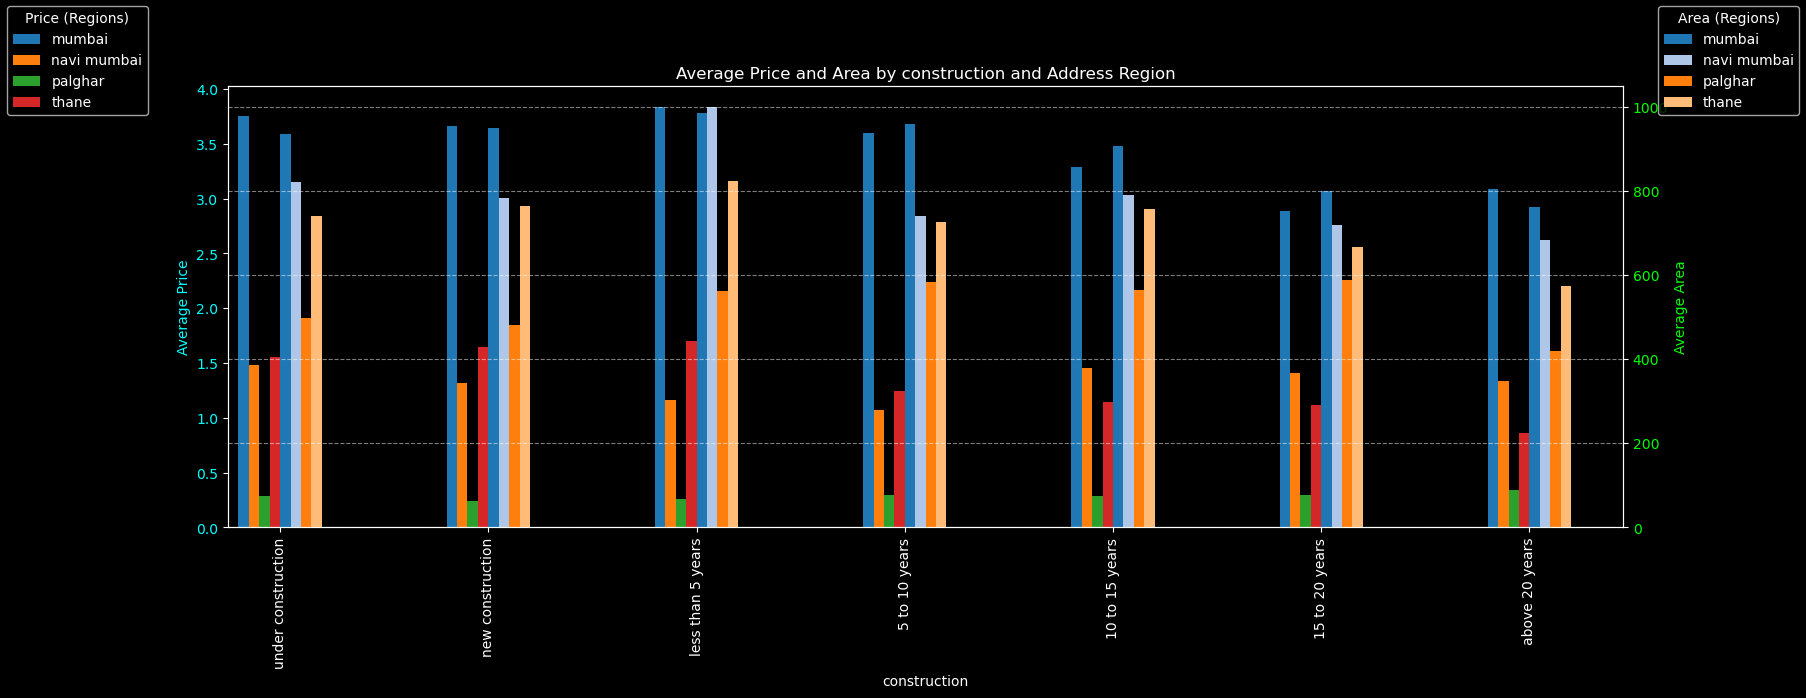

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply dark theme
plt.style.use('dark_background')

# Create pivot table
pivot_table = df.pivot_table(values=['price', 'area'], index='construction', columns='addressregion', aggfunc='mean')

# Define color palettes
price_colors = sns.color_palette("tab10", n_colors=pivot_table['price'].shape[1])
area_colors = sns.color_palette("tab20", n_colors=pivot_table['area'].shape[1])

# Plot the pivot table with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 7))  # Increase figure width

# Plot price on the first y-axis
price_bars = pivot_table['price'].plot(kind='bar', ax=ax1, position=1, width=0.2, color=price_colors, legend=False)
ax1.set_xlabel('construction')
ax1.set_ylabel('Average Price', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')

# Create a second y-axis to plot area
ax2 = ax1.twinx()
area_bars = pivot_table['area'].plot(kind='bar', ax=ax2, position=0, width=0.2, color=area_colors, legend=False)
ax2.set_ylabel('Average Area', color='lime')
ax2.tick_params(axis='y', labelcolor='lime')

# Adding legends manually
price_handles, price_labels = ax1.get_legend_handles_labels()
area_handles, area_labels = ax2.get_legend_handles_labels()

fig.legend(price_handles, price_labels, loc="upper left", title="Price (Regions)")
fig.legend(area_handles, area_labels, loc="upper right", title="Area (Regions)")

# Customize the plot
plt.title('Average Price and Area by construction and Address Region')
plt.xticks(rotation=45)

# Add more space between x-axis labels and adjust layout
plt.subplots_adjust(bottom=0.25, hspace=0.5, wspace=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\3830523541.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values=['price', 'area'], index='construction', columns='addressregion', aggfunc='mean')


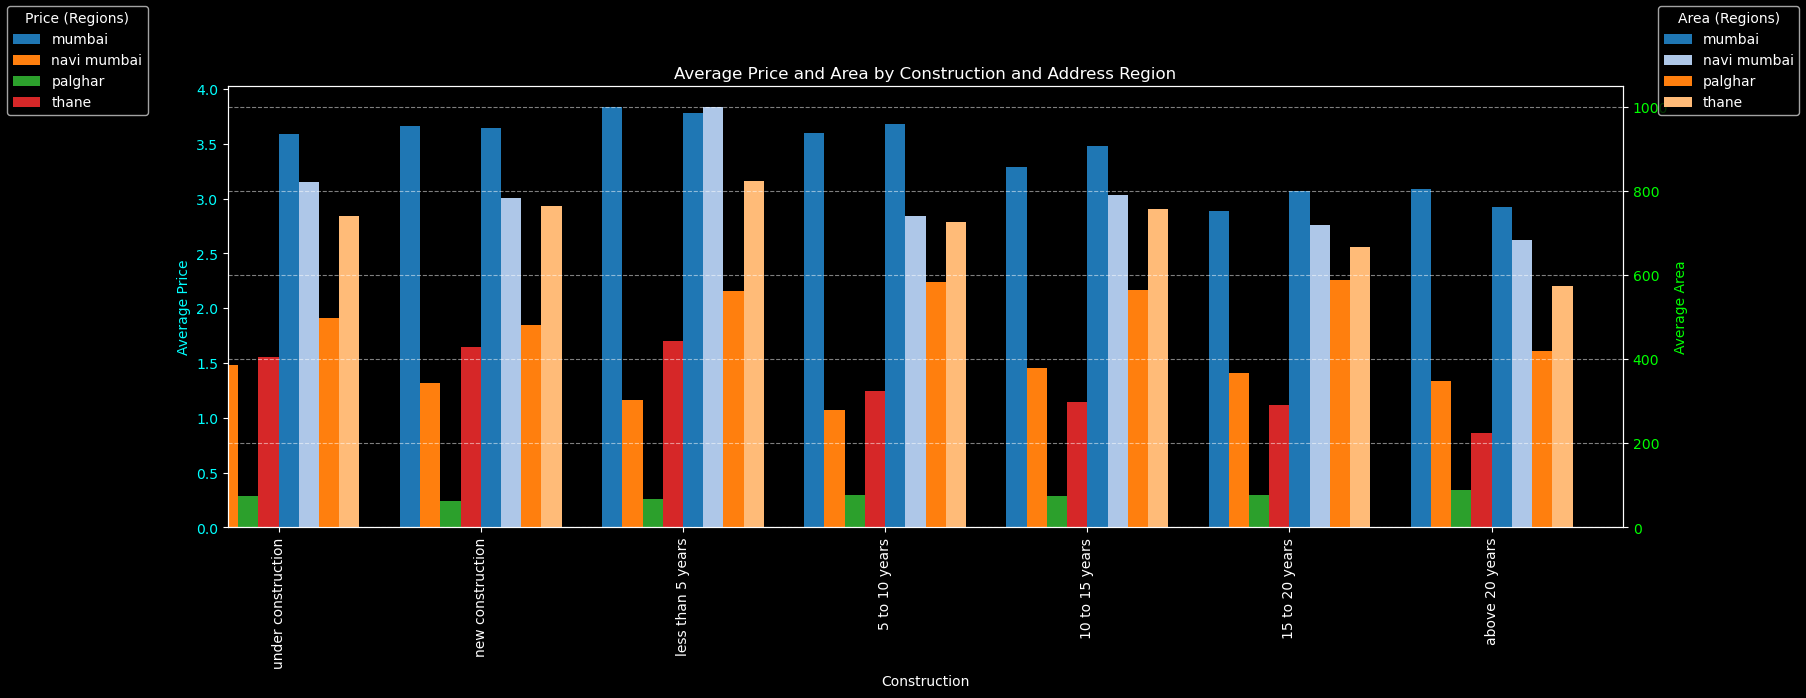

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply dark theme
plt.style.use('dark_background')

# Create pivot table
pivot_table = df.pivot_table(values=['price', 'area'], index='construction', columns='addressregion', aggfunc='mean')

# Generate distinct colors for each region
num_regions = len(pivot_table['price'].columns)
price_colors = sns.color_palette("tab10", num_regions)  # Unique colors for price
area_colors = sns.color_palette("tab20", num_regions)  # Unique colors for area

# Plot the pivot table with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 7))  # Increase figure width

# Plot price on the first y-axis
price_bars = pivot_table['price'].plot(kind='bar', ax=ax1, position=1, width=0.4, color=price_colors, legend=False)
ax1.set_xlabel('Construction')
ax1.set_ylabel('Average Price', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')

# Create a second y-axis to plot area
ax2 = ax1.twinx()
area_bars = pivot_table['area'].plot(kind='bar', ax=ax2, position=0, width=0.4, color=area_colors, legend=False)
ax2.set_ylabel('Average Area', color='lime')
ax2.tick_params(axis='y', labelcolor='lime')

# Adding legends manually
price_handles, price_labels = ax1.get_legend_handles_labels()
area_handles, area_labels = ax2.get_legend_handles_labels()

fig.legend(price_handles, price_labels, loc="upper left", title="Price (Regions)")
fig.legend(area_handles, area_labels, loc="upper right", title="Area (Regions)")

# Customize the plot
plt.title('Average Price and Area by Construction and Address Region')
plt.xticks(rotation=45)

# Add more space between x-axis labels and adjust layout
plt.subplots_adjust(bottom=0.25, hspace=0.5, wspace=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### observation
- Mumbai: Balanced property price and area, reflecting fair value.
- Navi Mumbai, Palghar, Thane: Larger spaces at lower prices, offering better value compared to Mumbai's inflated prices due to high demand.

In [435]:
plt.style.use('default')

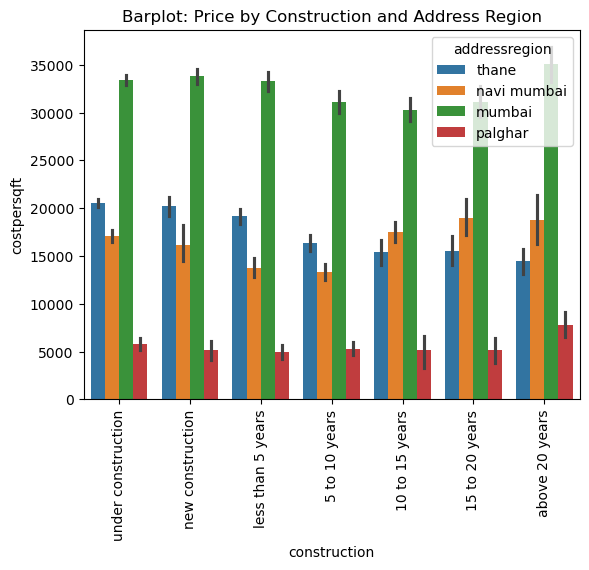

In [436]:
sns.barplot(x='construction', y='costpersqft', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean costpersqft for less than 10 year age of properties follows this trend : Mumbai > Thane > Navi Mumbai > Palghar
- - mean costpersqft for older than 10 year age of properties follows this trend : Mumbai > Navi Mumbai > Thane > Palghar

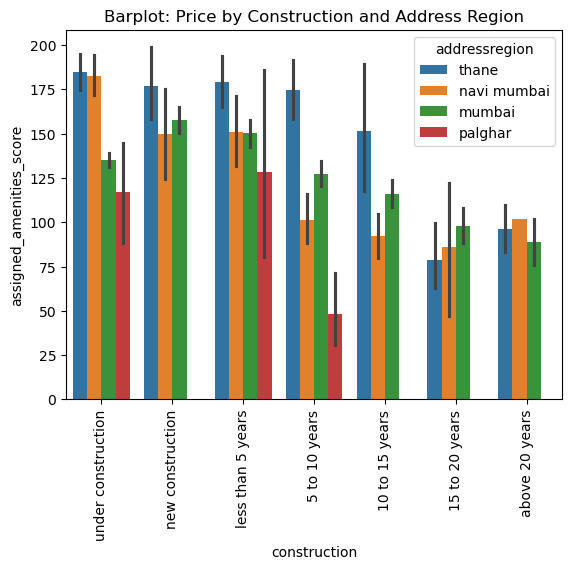

In [437]:
sns.barplot(x='construction', y='assigned_amenities_score', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean assigned_amenities_score for less than 15 year age of properties follows this trend :  Thane > mumbai & Navi Mumbai > Palghar
- under construction properties Thane and navi mumbai region have more amenities than the mumbai region

In [438]:
#df.to_excel('analysis_dataset.xlsx',index=False)

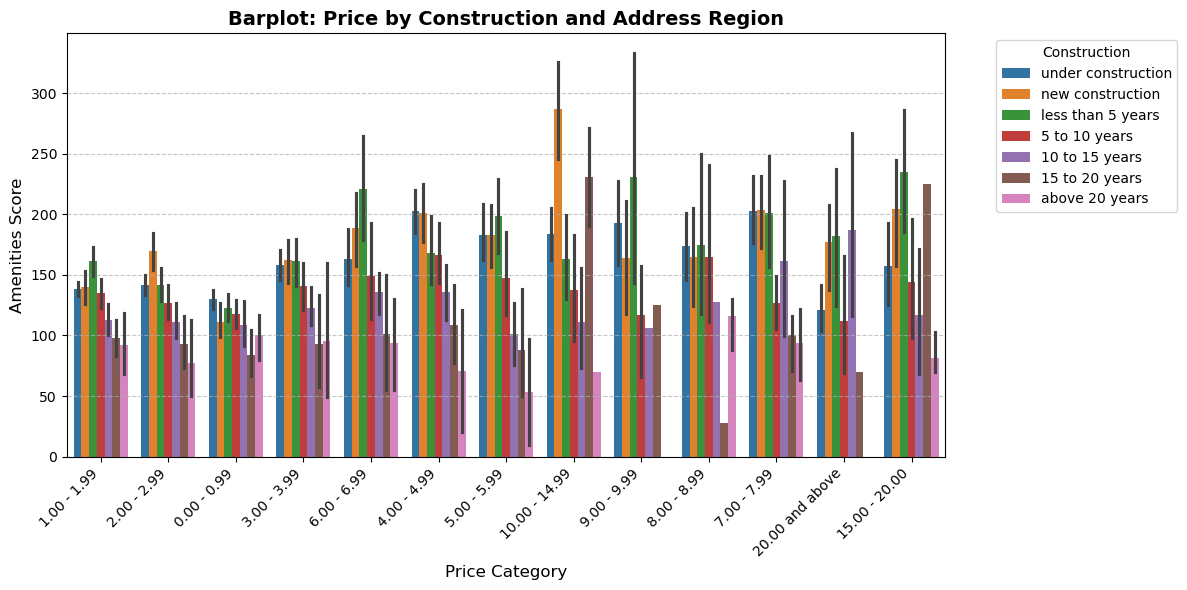

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the bar plot with the specified hue order
sns.barplot(x='price_category', y='assigned_amenities_score', hue='construction', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a title and labels for clarity
plt.title("Barplot: Price by Construction and Address Region", fontsize=14, weight='bold')
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Amenities Score", fontsize=12)

# Reposition the legend to avoid overlap with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Construction')

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


### observations  
- Overall, for properties priced between 0 to 8 cr, the amenities score decreases within each price category, following this trend: under construction > less than 5 years > new construction > 10 to 15 years > 5 to 10 years > 15 to 20 years > above 20 years.  
- As the price category increases, the overall amenities score also increases up to 6 cr properties, but beyond that, the trend is less clear.  
- For properties above 10 cr, the amenities score trend for newly constructed, under-construction, and 15 to 20-year-old properties follows: '10-14.99' > '15-20' > '20 and above'.  
- Among properties above 10 cr, newly constructed properties have a higher amenities score than under-construction properties.  

C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\2092164295.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


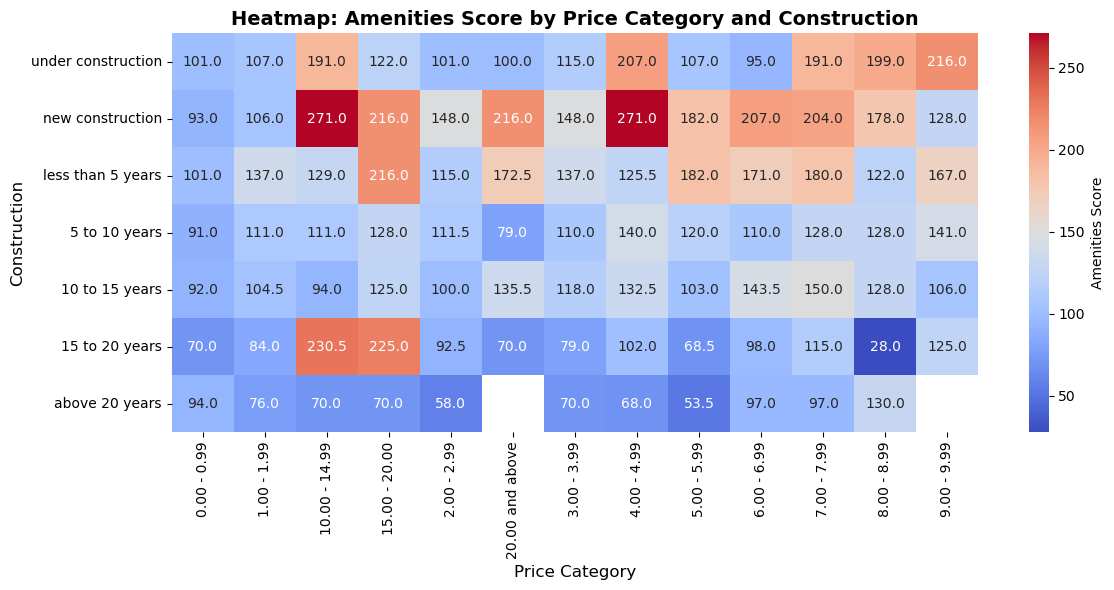

In [440]:
pivot_df = df.pivot_table(
    index='construction', 
    columns='price_category', 
    values='assigned_amenities_score', 
    aggfunc='median'  # Adjust based on your data
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Amenities Score'})

# Add labels and title
plt.title("Heatmap: Amenities Score by Price Category and Construction", fontsize=14, weight='bold')
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Construction", fontsize=12)

plt.tight_layout()
plt.show()


###oObservations:
- The graph shows the median of amenities scores based on grouping by amenities score and construction.
- As shown below, most properties in the above 5 crore price range are from Mumbai, so the amenities score is primarily from the Mumbai re (Mumbai accounts for the largest share of properties in that price category.)gion.
- Properties above 4 crore, including those that are under construction, new construction, and less than 5 years old (mostly from Mumbai), have a high amenities score.
- Properties in the 0 to 3 crore range have an amenities score below 150, as most regions in this price range have properties.

C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\3854120254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['price_category', 'construction', 'addressregion']).size().reset_index(name='count')


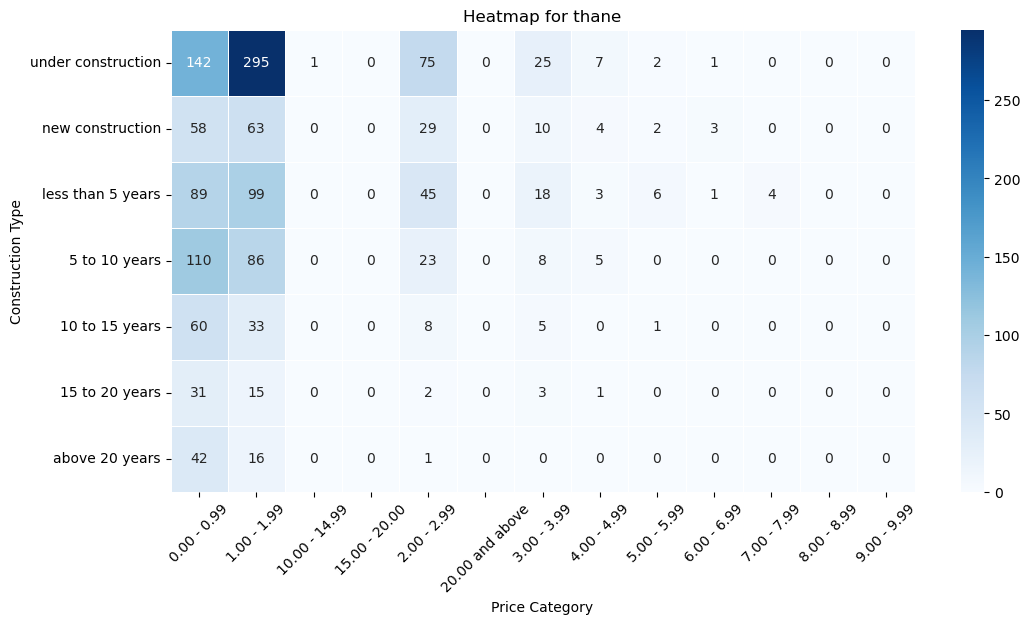

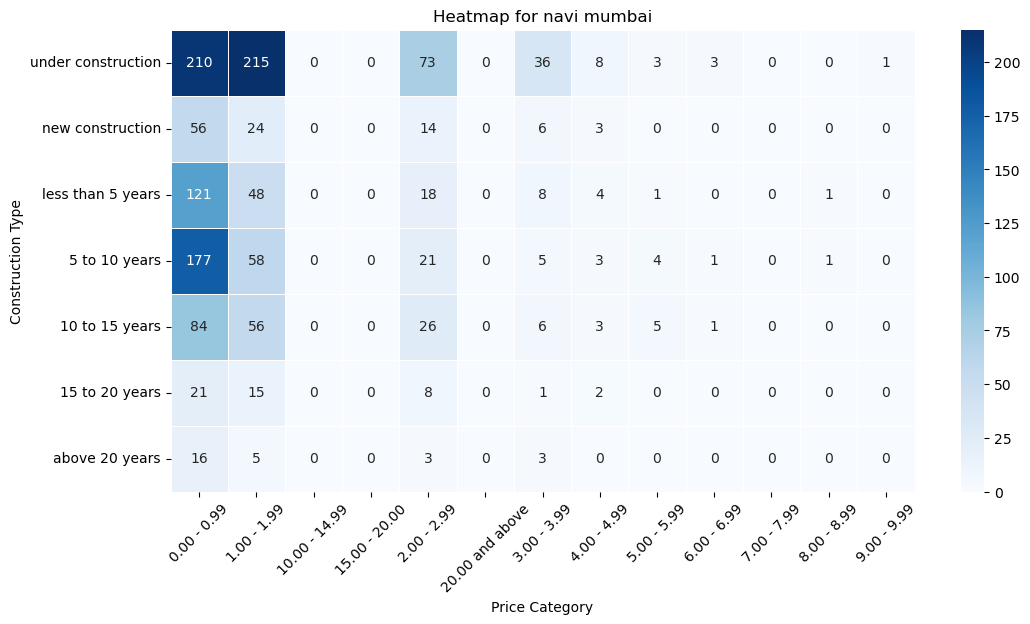

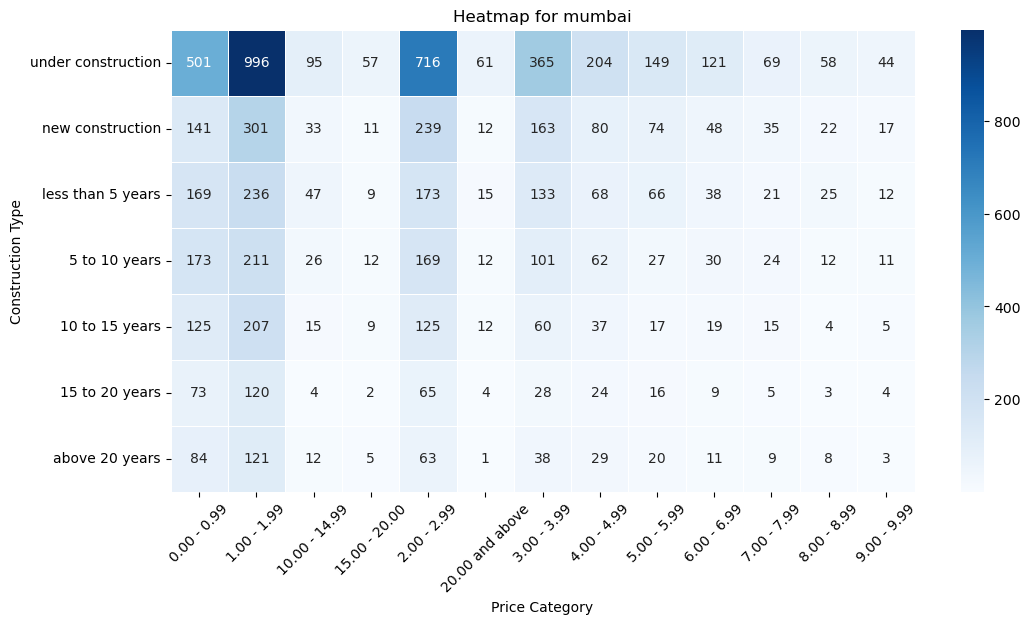

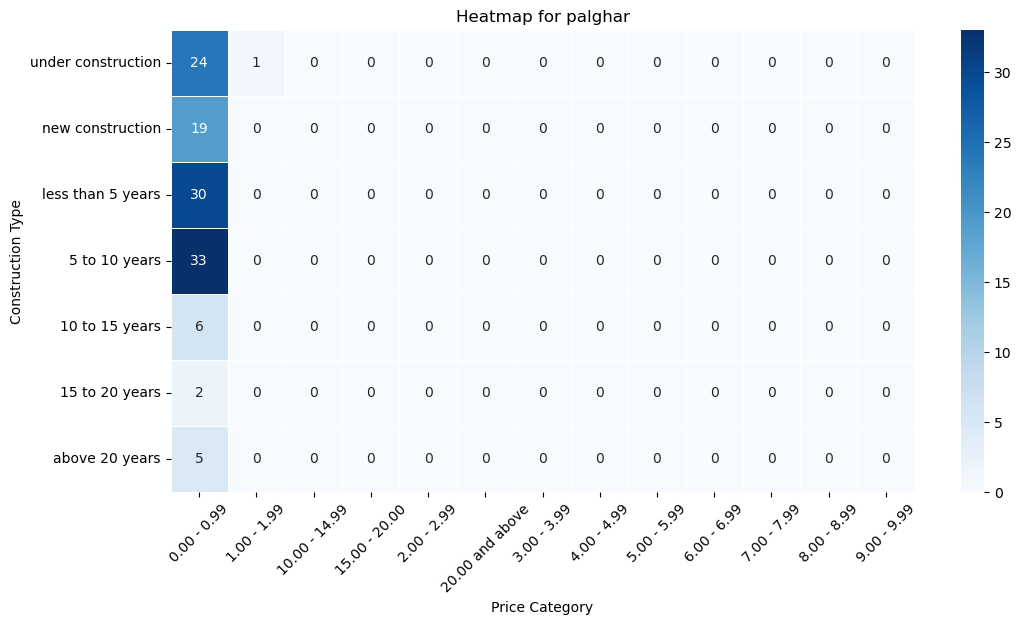

In [441]:
# Count occurrences
heatmap_data = df.groupby(['price_category', 'construction', 'addressregion']).size().reset_index(name='count')

# Pivot for heatmap (reshape so each addressregion has its own heatmap)
for region in df['addressregion'].unique():
    pivot_df = heatmap_data[heatmap_data['addressregion'] == region].pivot(index='construction', columns='price_category', values='count')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)
    plt.title(f'Heatmap for {region}')
    plt.xlabel('Price Category')
    plt.ylabel('Construction Type')
    plt.xticks(rotation=45)
    plt.show()

### observation 
- most of the properties above 5cr region are from mumbai and thane ,palghar,navi mumbai wont have properties in that price range so this can create bias
- palghar wont have properties above 1cr
- Under construction properties dominate in all regions except Palghar, which may indicate a bias toward newer development projects.

C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\1502388937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['price_category', 'construction', 'addressregion'])['assigned_amenities_score'].mean().reset_index()


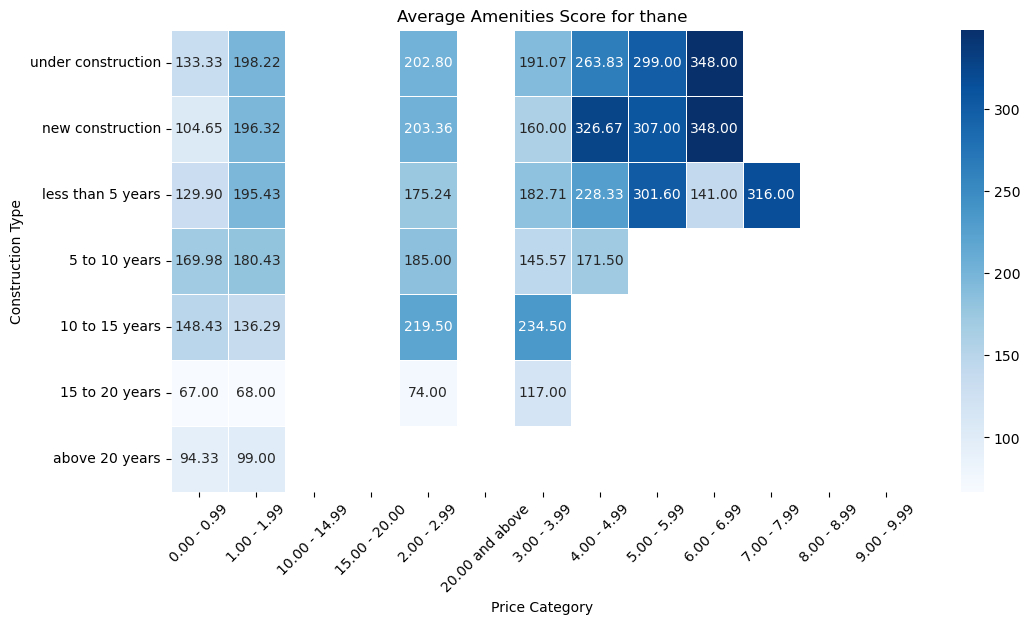

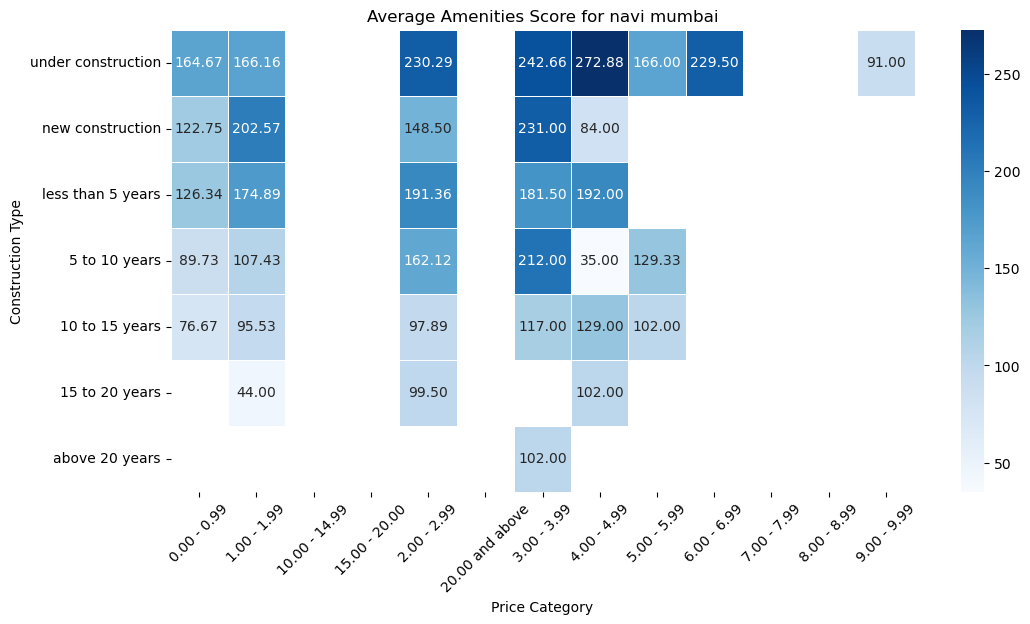

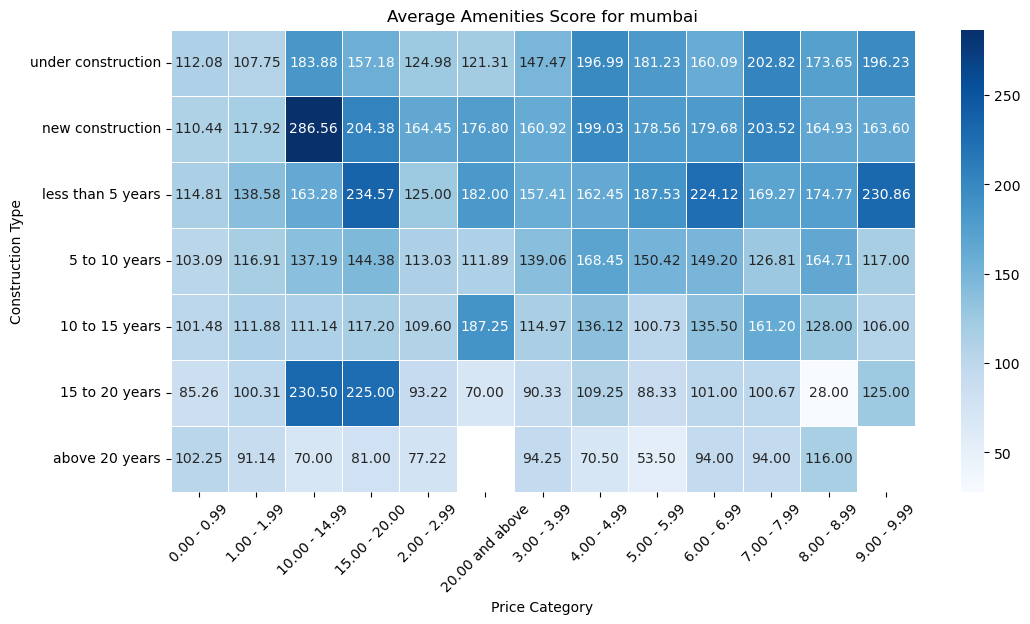

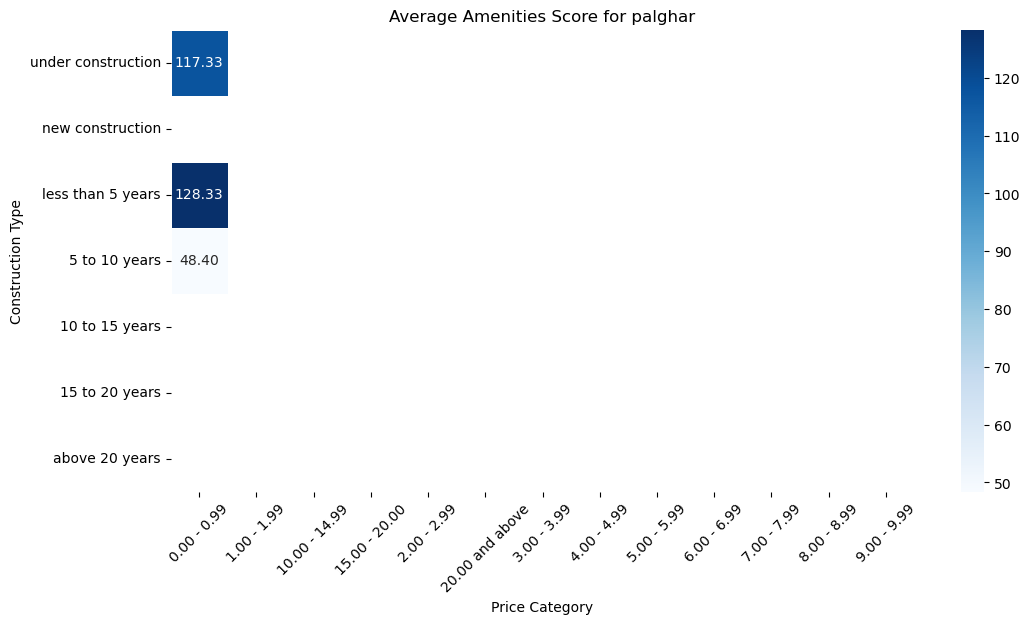

In [442]:
# Compute the average amenities score
heatmap_data = df.groupby(['price_category', 'construction', 'addressregion'])['assigned_amenities_score'].mean().reset_index()

# Plot heatmap for each address region
for region in df['addressregion'].unique():
    pivot_df = heatmap_data[heatmap_data['addressregion'] == region].pivot(index='construction', columns='price_category', values='assigned_amenities_score')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
    plt.title(f'Average Amenities Score for {region}')
    plt.xlabel('Price Category')
    plt.ylabel('Construction Type')
    plt.xticks(rotation=45)
    plt.show()

### observation 
- The amenities score should ideally increase as the price range moves from 0 to above 20 crores. However, this is not the case in most scenarios. A possible reason could be the high variance in the number of properties.
- most of the plots are empty because of no properties

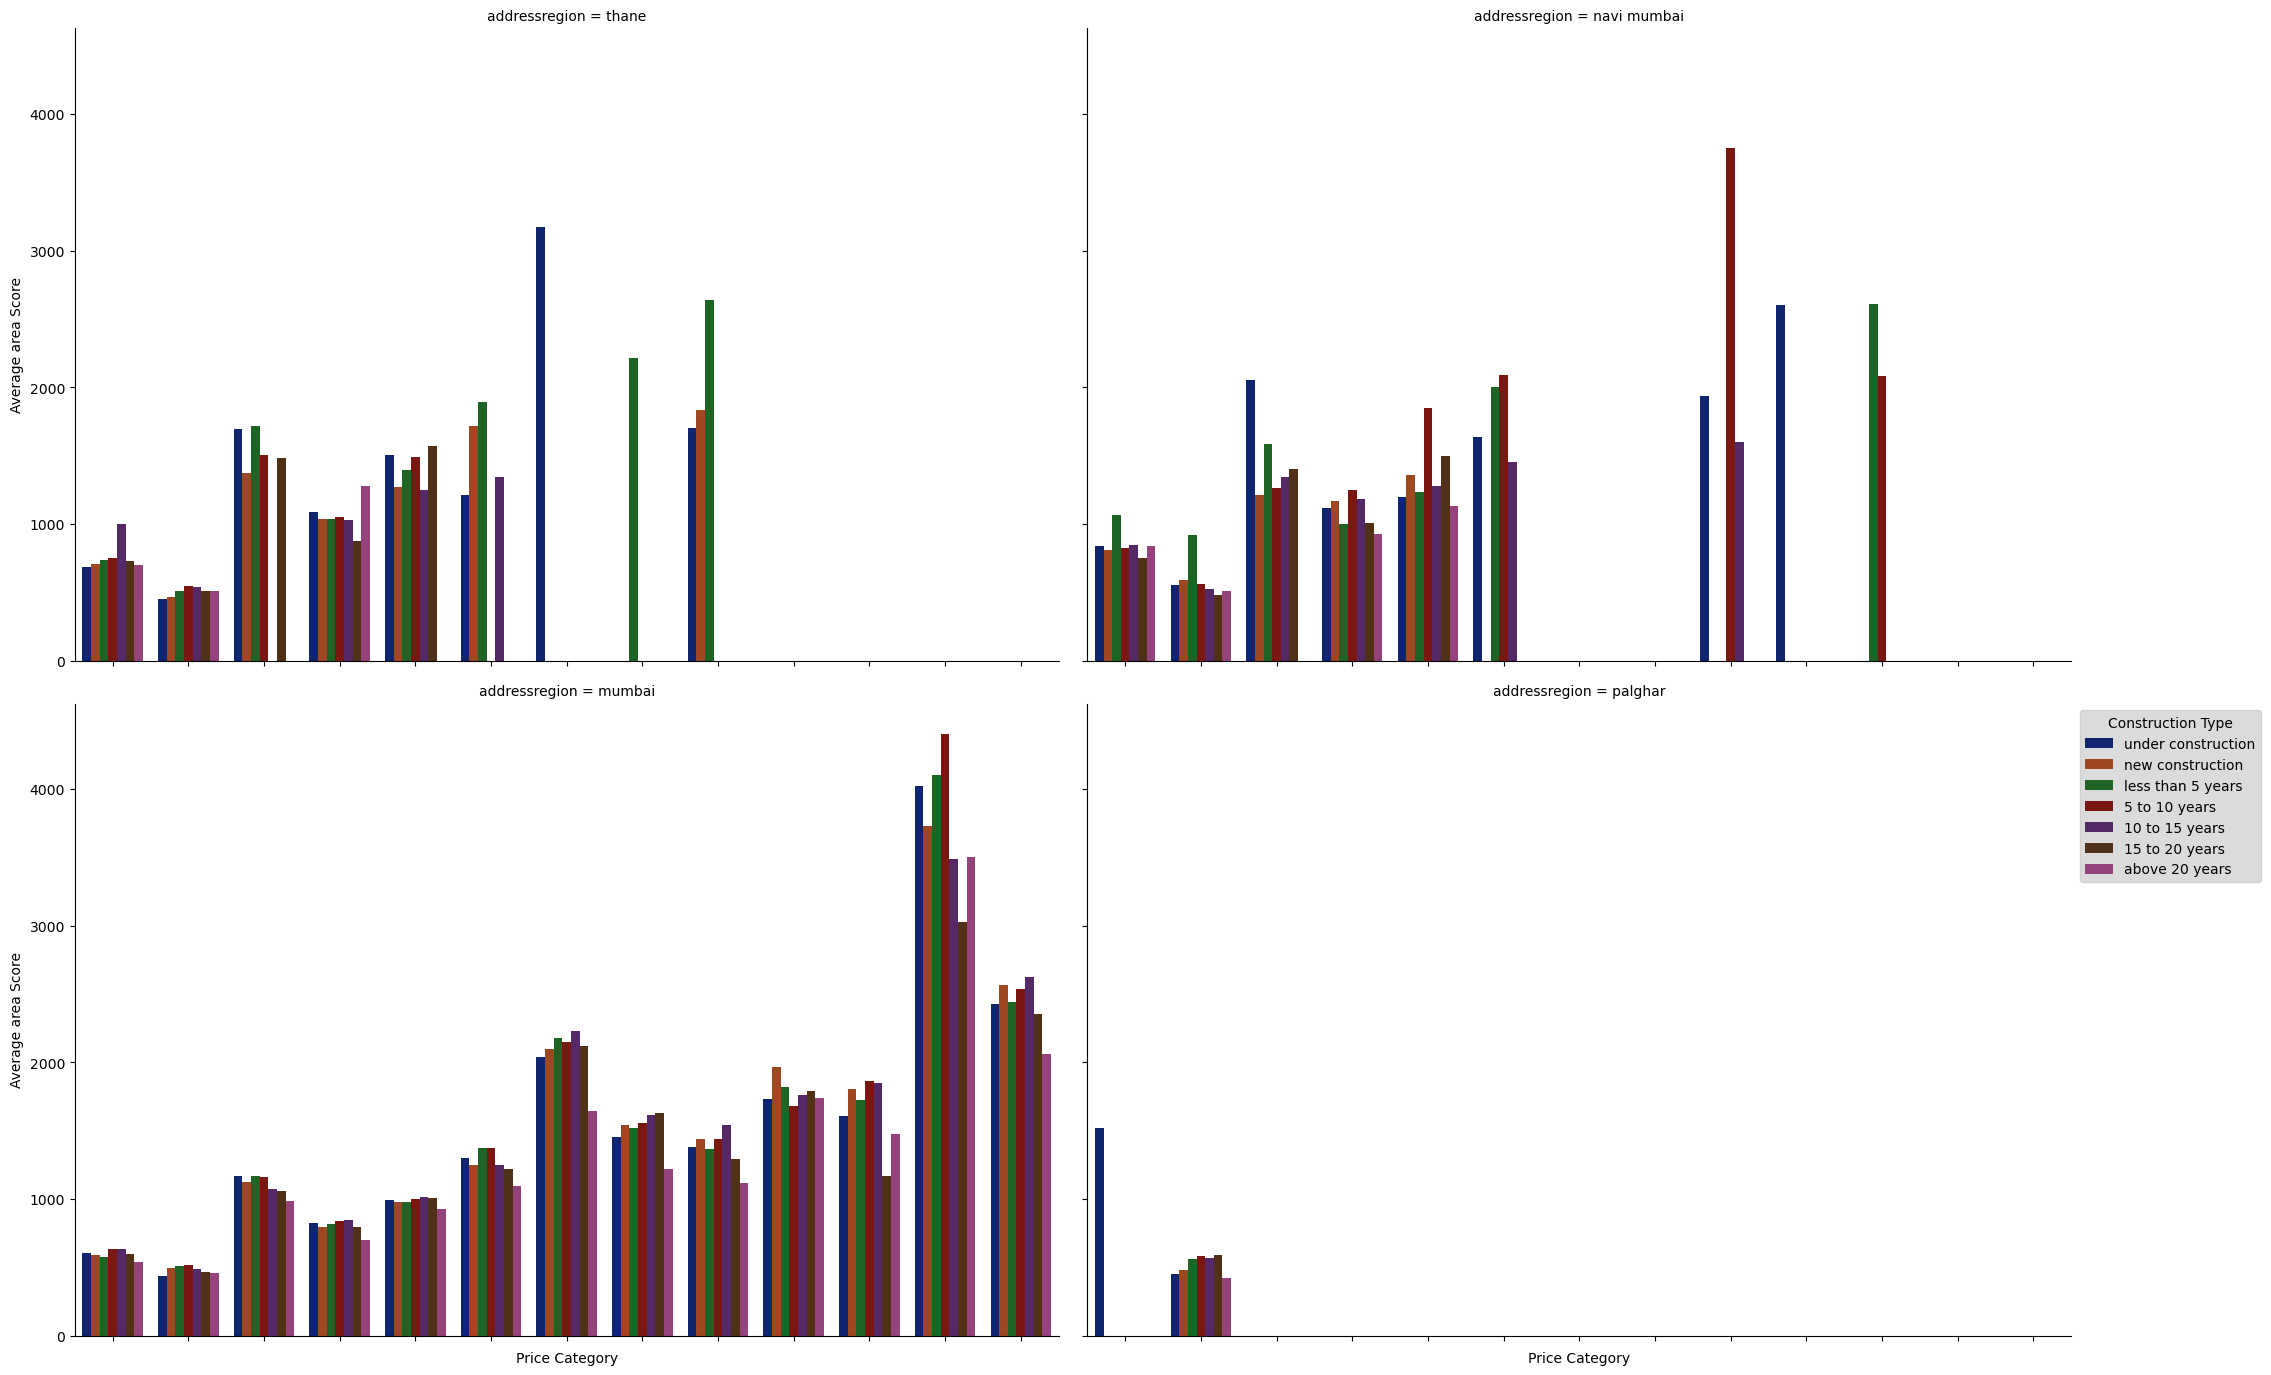

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark color palette with limited colors
palette = sns.color_palette("dark", n_colors=df["construction"].nunique())  

# Create FacetGrid for multiple bar plots with larger plot dimensions
g = sns.FacetGrid(df, col="addressregion", col_wrap=2, height=7, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="price_category", y="area", hue="construction", errorbar=None, palette=palette)

# Rotate x-axis labels and set axis labels
g.set_xticklabels(rotation=45)
g.set_axis_labels("Price Category", "Average area Score")

# Add a single legend and adjust size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Construction Type', frameon=True, facecolor='lightgrey')

# Show plot
plt.show()


### observation
- overall trend is as the area increases, the price of the property also increases.  
- Within each price range, each construction type has different property areas.  
- For propertiein mumbai region s priced at 1 crore and above, those older than 15 years generally have less area compared to other construction types within the same price range category.

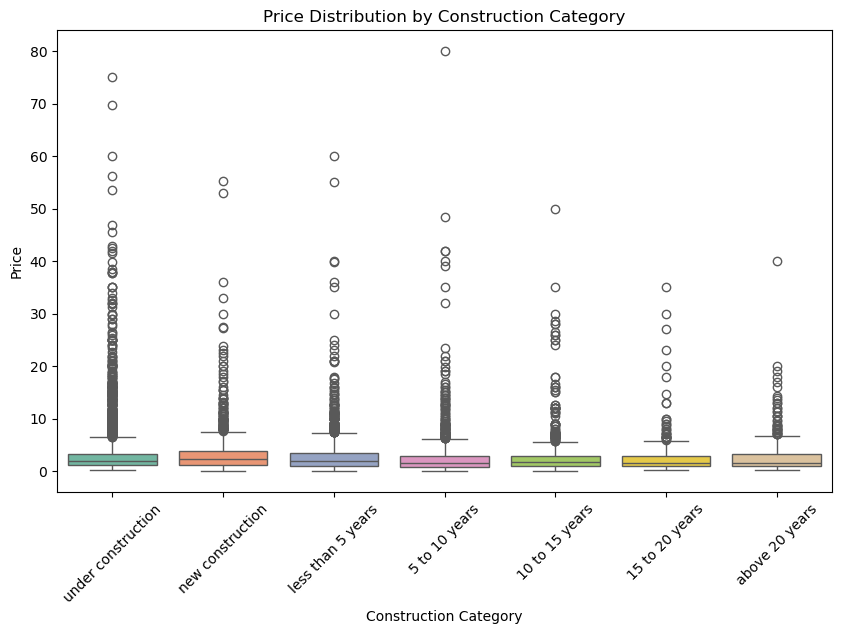

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="construction", y="price", hue="construction", palette="Set2", legend=False)

plt.title("Price Distribution by Construction Category")
plt.xlabel("Construction Category")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [445]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
percentiles = df.groupby("construction")["price"].quantile([0.25, 0.75]).unstack()

# Rename the columns correctly
percentiles.columns = ["Q1 (25th Percentile)", "Q3 (75th Percentile)"]

# Compute IQR
percentiles["IQR"] = percentiles["Q3 (75th Percentile)"] - percentiles["Q1 (25th Percentile)"]

# Compute Upper Whisker
percentiles["Upper Whisker"] = percentiles["Q3 (75th Percentile)"] + (1.5 * percentiles["IQR"])

# Display the result
print(percentiles[["Q1 (25th Percentile)", "Q3 (75th Percentile)", "Upper Whisker"]])


                    Q1 (25th Percentile)  Q3 (75th Percentile)  Upper Whisker
construction                                                                 
under construction                1.1500                3.3175        6.56875
new construction                  1.2200                3.7750        7.60750
less than 5 years                 0.9300                3.5000        7.35500
5 to 10 years                     0.7000                2.9100        6.22500
10 to 15 years                    0.9000                2.8000        5.65000
15 to 20 years                    0.9275                2.9000        5.85875
above 20 years                    0.9000                3.2500        6.77500


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\4158790170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = df.groupby("construction")["price"].quantile([0.25, 0.75]).unstack()


### observation 
- 50% of properties in all age of construction is between 70lakh to 4cr 
- higher than 8 cr properties in all age of construction are outliers
- under construction properties have higher number of outlires 

# overlooking 

In [446]:
df['overlooking'].value_counts().index

Index(['main road', 'garden/park, main road', 'garden/park, main road, pool',
       'garden/park', 'garden/park, pool', 'pool', 'main road, pool'],
      dtype='object', name='overlooking')

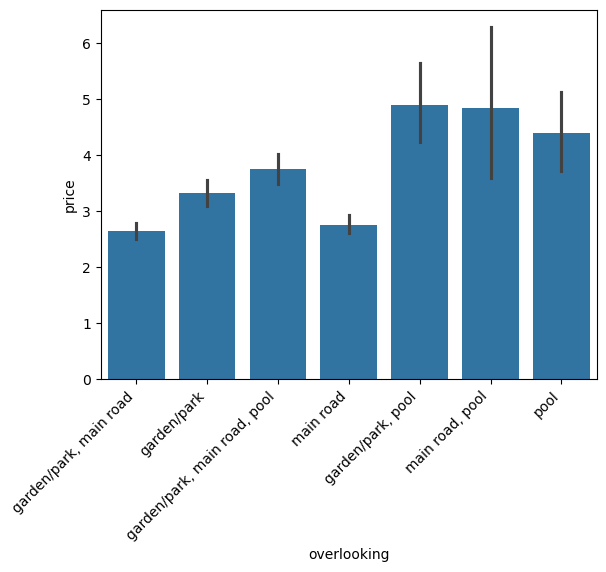

In [447]:
# using price mean 
sns.barplot(data=df, x='overlooking', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [448]:
# Create a pivot table to show the average price for each overlooking category
pivot_table = df.pivot_table(values='price', index='overlooking', aggfunc='mean')

# Display the pivot table
print(pivot_table)


                                 price
overlooking                           
garden/park                   3.332119
garden/park, main road        2.647437
garden/park, main road, pool  3.756593
garden/park, pool             4.904027
main road                     2.763878
main road, pool               4.839492
pool                          4.392078


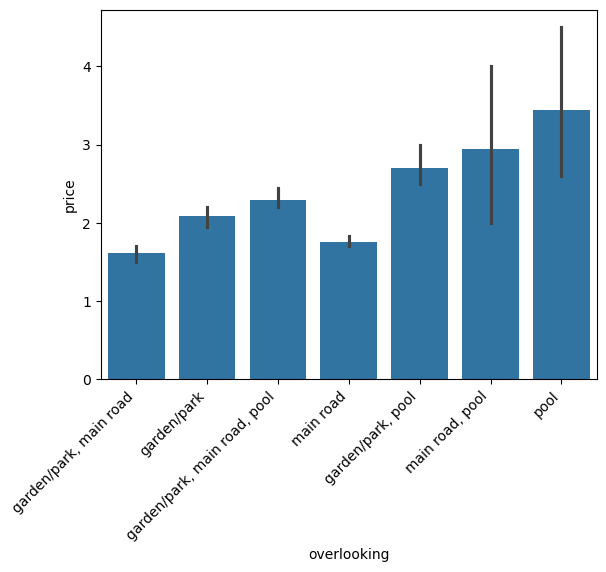

In [449]:
#using price median 
sns.barplot(data=df, x='overlooking', y='price',estimator = np.median)
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [495]:
# Create a pivot table to show the average price for each overlooking category
pivot_table = df.pivot_table(values='price', index='overlooking', aggfunc='median')

# Display the pivot table
print(pivot_table)


                              price
overlooking                        
garden/park                   2.090
garden/park, main road        1.620
garden/park, main road, pool  2.290
garden/park, pool             2.700
main road                     1.750
main road, pool               2.950
pool                          3.445
unknown                       1.400


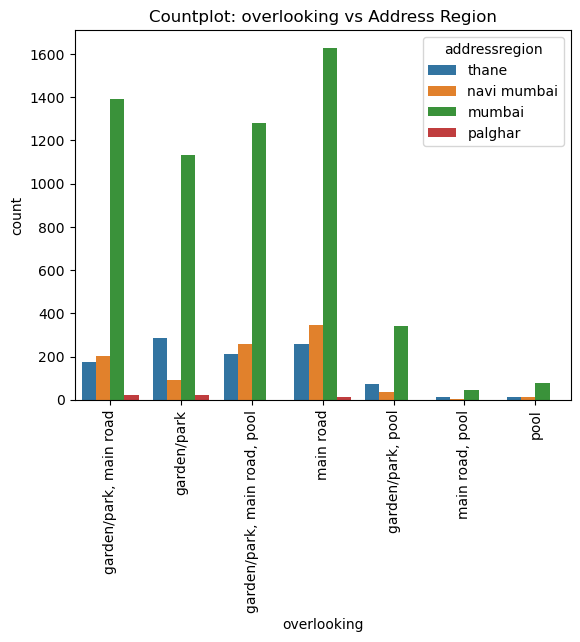

In [450]:
sns.countplot(x='overlooking', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Countplot: overlooking vs Address Region")
plt.show()

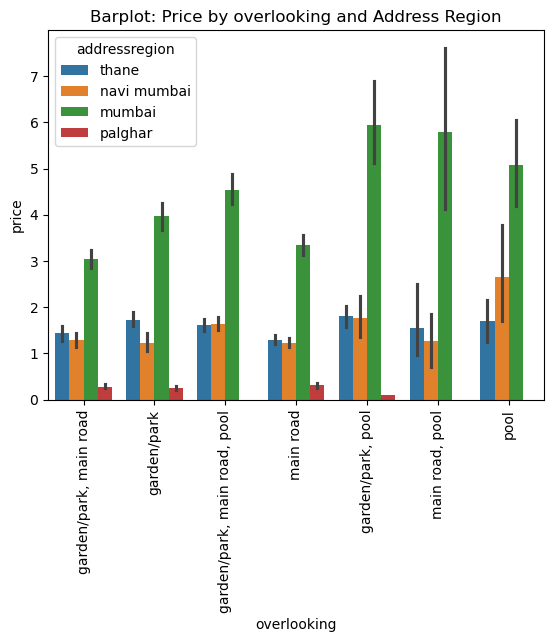

In [451]:
sns.barplot(x='overlooking', y='price', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by overlooking and Address Region")
plt.show()

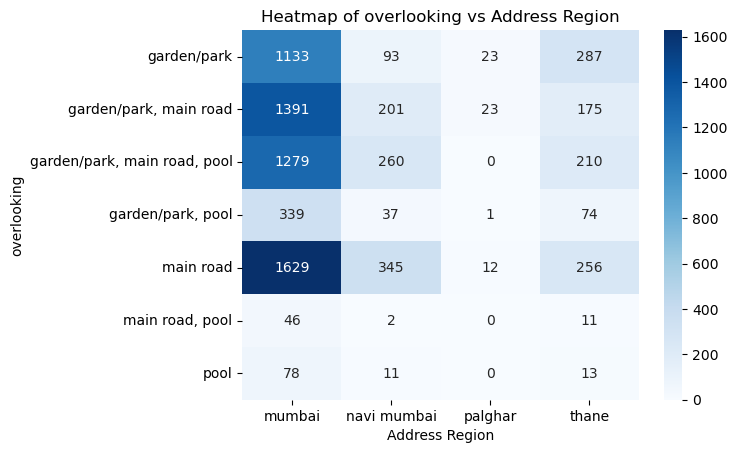

In [452]:
# Create a crosstab
cross_tab = pd.crosstab(df['overlooking'], df['addressregion'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of overlooking vs Address Region")
plt.xlabel("Address Region")
plt.ylabel("overlooking")
plt.show()

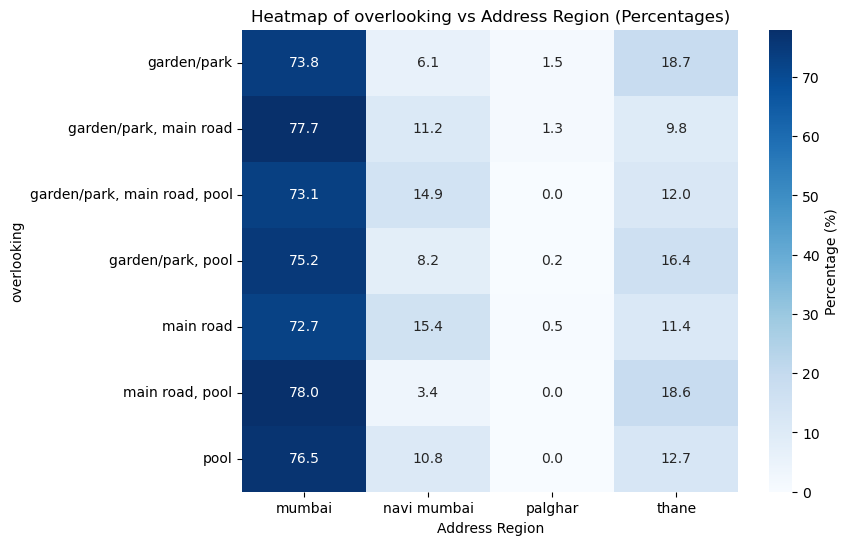

In [453]:
# Create a crosstab of counts
cross_tab = pd.crosstab(df['overlooking'], df['addressregion'])

# Normalize the crosstab to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot heatmap with percentages
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(cross_tab_percentage, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title("Heatmap of overlooking vs Address Region (Percentages)")
plt.xlabel("Address Region")
plt.ylabel("overlooking")
plt.show()

In [454]:
# Create a pivot table to show the average price for each combination of overlooking category and address region
pivot_table = df.pivot_table(values='price', index='overlooking', columns='addressregion', aggfunc='mean')

# Display the pivot table
print(pivot_table)

addressregion                   mumbai  navi mumbai   palghar     thane
overlooking                                                            
garden/park                   3.972168     1.234215  0.253435  1.731909
garden/park, main road        3.035040     1.293104  0.282957  1.432851
garden/park, main road, pool  4.539735     1.641169       NaN  1.605986
garden/park, pool             5.936578     1.761919  0.100000  1.809797
main road                     3.337242     1.229843  0.310833  1.297734
main road, pool               5.780000     1.275000       NaN  1.554545
pool                          5.086641     2.656727       NaN  1.693077


In [496]:
# Create a pivot table to show the average price for each combination of overlooking category and address region
pivot_table = df.pivot_table(values='price', index='overlooking', columns='addressregion', aggfunc='median')

# Display the pivot table
print(pivot_table)

addressregion                 mumbai  navi mumbai  palghar  thane
overlooking                                                      
garden/park                    2.500        0.924    0.250  1.240
garden/park, main road         1.900        0.960    0.247  1.200
garden/park, main road, pool   2.800        1.315      NaN  1.275
garden/park, pool              3.300        1.700    0.100  1.645
main road                      2.220        0.910    0.285  1.100
main road, pool                3.900        1.275      NaN  1.110
pool                           4.405        2.000      NaN  1.370
unknown                        1.860        0.780    0.220  0.970


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\1605019948.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = region_df.pivot_table(
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\1605019948.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\1605019948.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = r

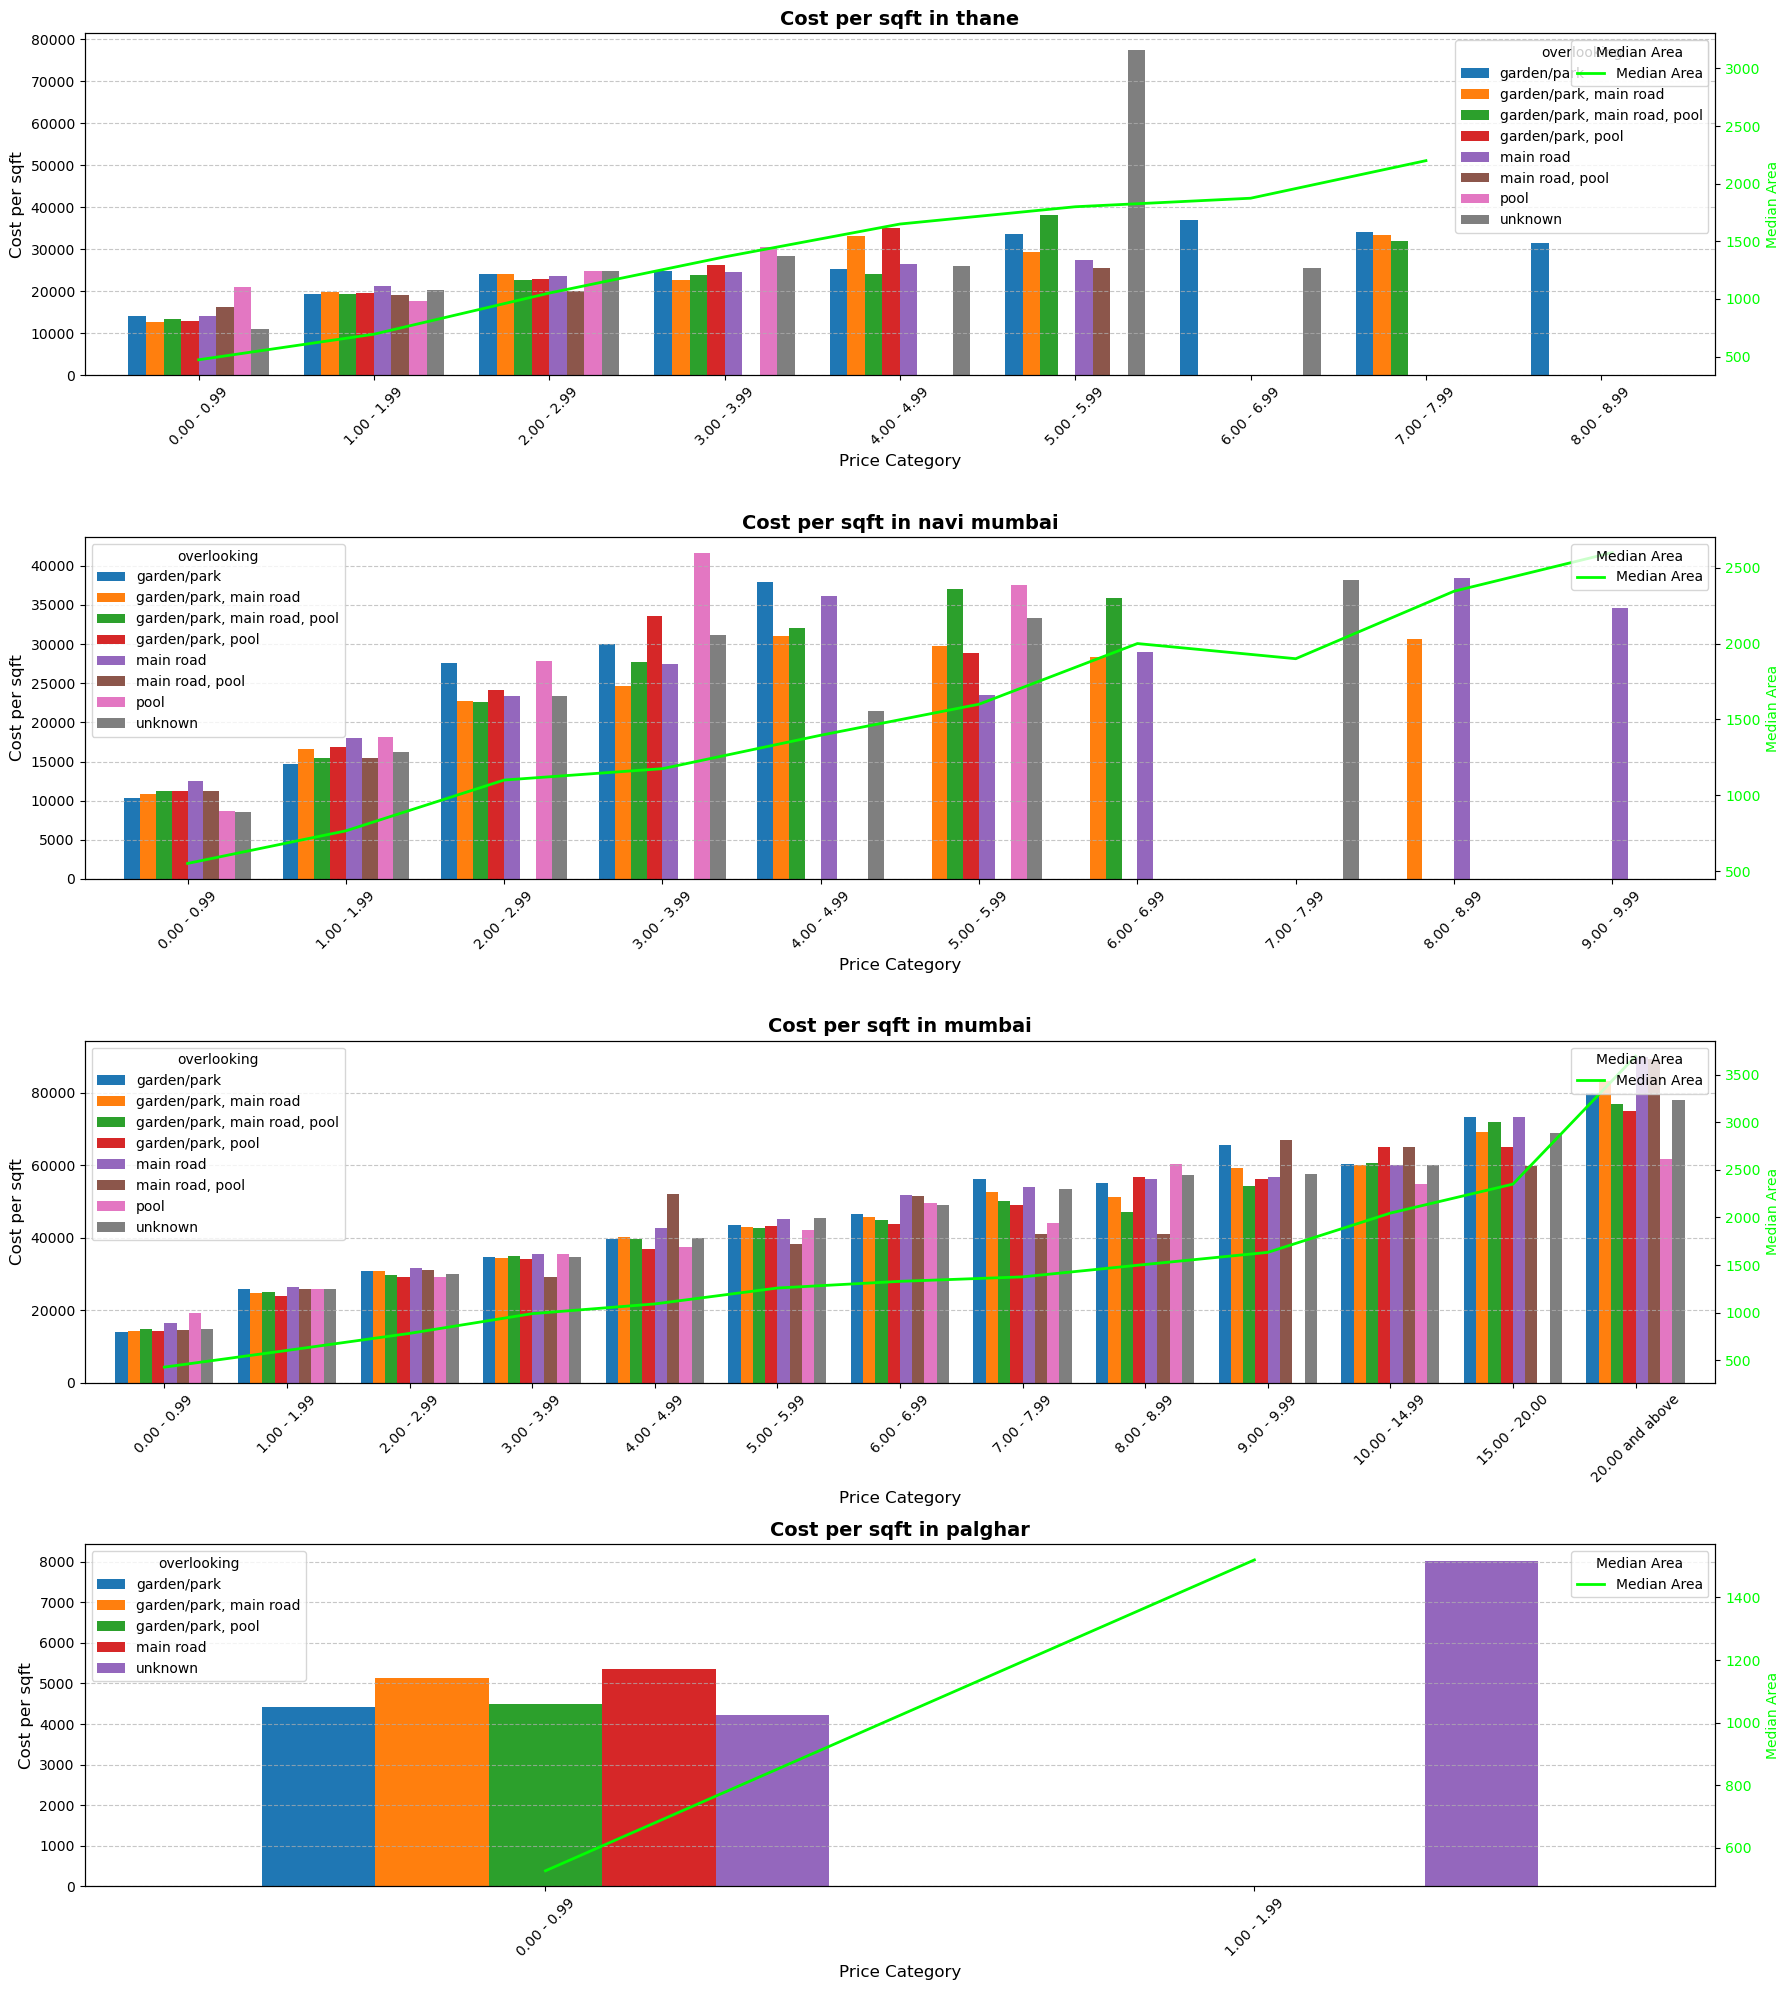

In [522]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define unique address regions
address_regions = df["addressregion"].unique()

# Set up subplots (one below the other)
fig, axes = plt.subplots(nrows=len(address_regions), ncols=1, figsize=(18, 5 * len(address_regions)))

# Define distinct colors
colors = sns.color_palette("tab10", n_colors=len(df["overlooking"].unique()))

# Plot for each address region
for i, region in enumerate(address_regions):
    region_df = df[df["addressregion"] == region]  # Filter data for region
    
    # Create the pivot table with price_category on columns and extra_rooms on index
    pivot_df = region_df.pivot_table(
        index="price_category", columns="overlooking", values="costpersqft", aggfunc="median"
    )  # Note the change here: 'price_category' is now on the x-axis
    
    # Plot the bar plot on the left y-axis
    pivot_df.plot(kind="bar", ax=axes[i], color=colors, width=0.8)
    
    # Create a second y-axis to plot area
    ax2 = axes[i].twinx()
    
    # Add area data (for demonstration, using the median cost per sqft for the area as an example)
    area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
    area_data.plot(kind='line', ax=ax2, color='lime', linewidth=2, label='Median Area')

    axes[i].set_title(f"Cost per sqft in {region}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Price Category", fontsize=12)
    axes[i].set_ylabel("Cost per sqft", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(title="overlooking")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # Customize the second y-axis (right side)
    ax2.set_ylabel('Median Area', color='lime')
    ax2.tick_params(axis='y', labelcolor='lime')
    ax2.legend(loc="upper right", title="Median Area")

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\642809945.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = region_df.pivot_table(
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\642809945.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\642809945.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = regi

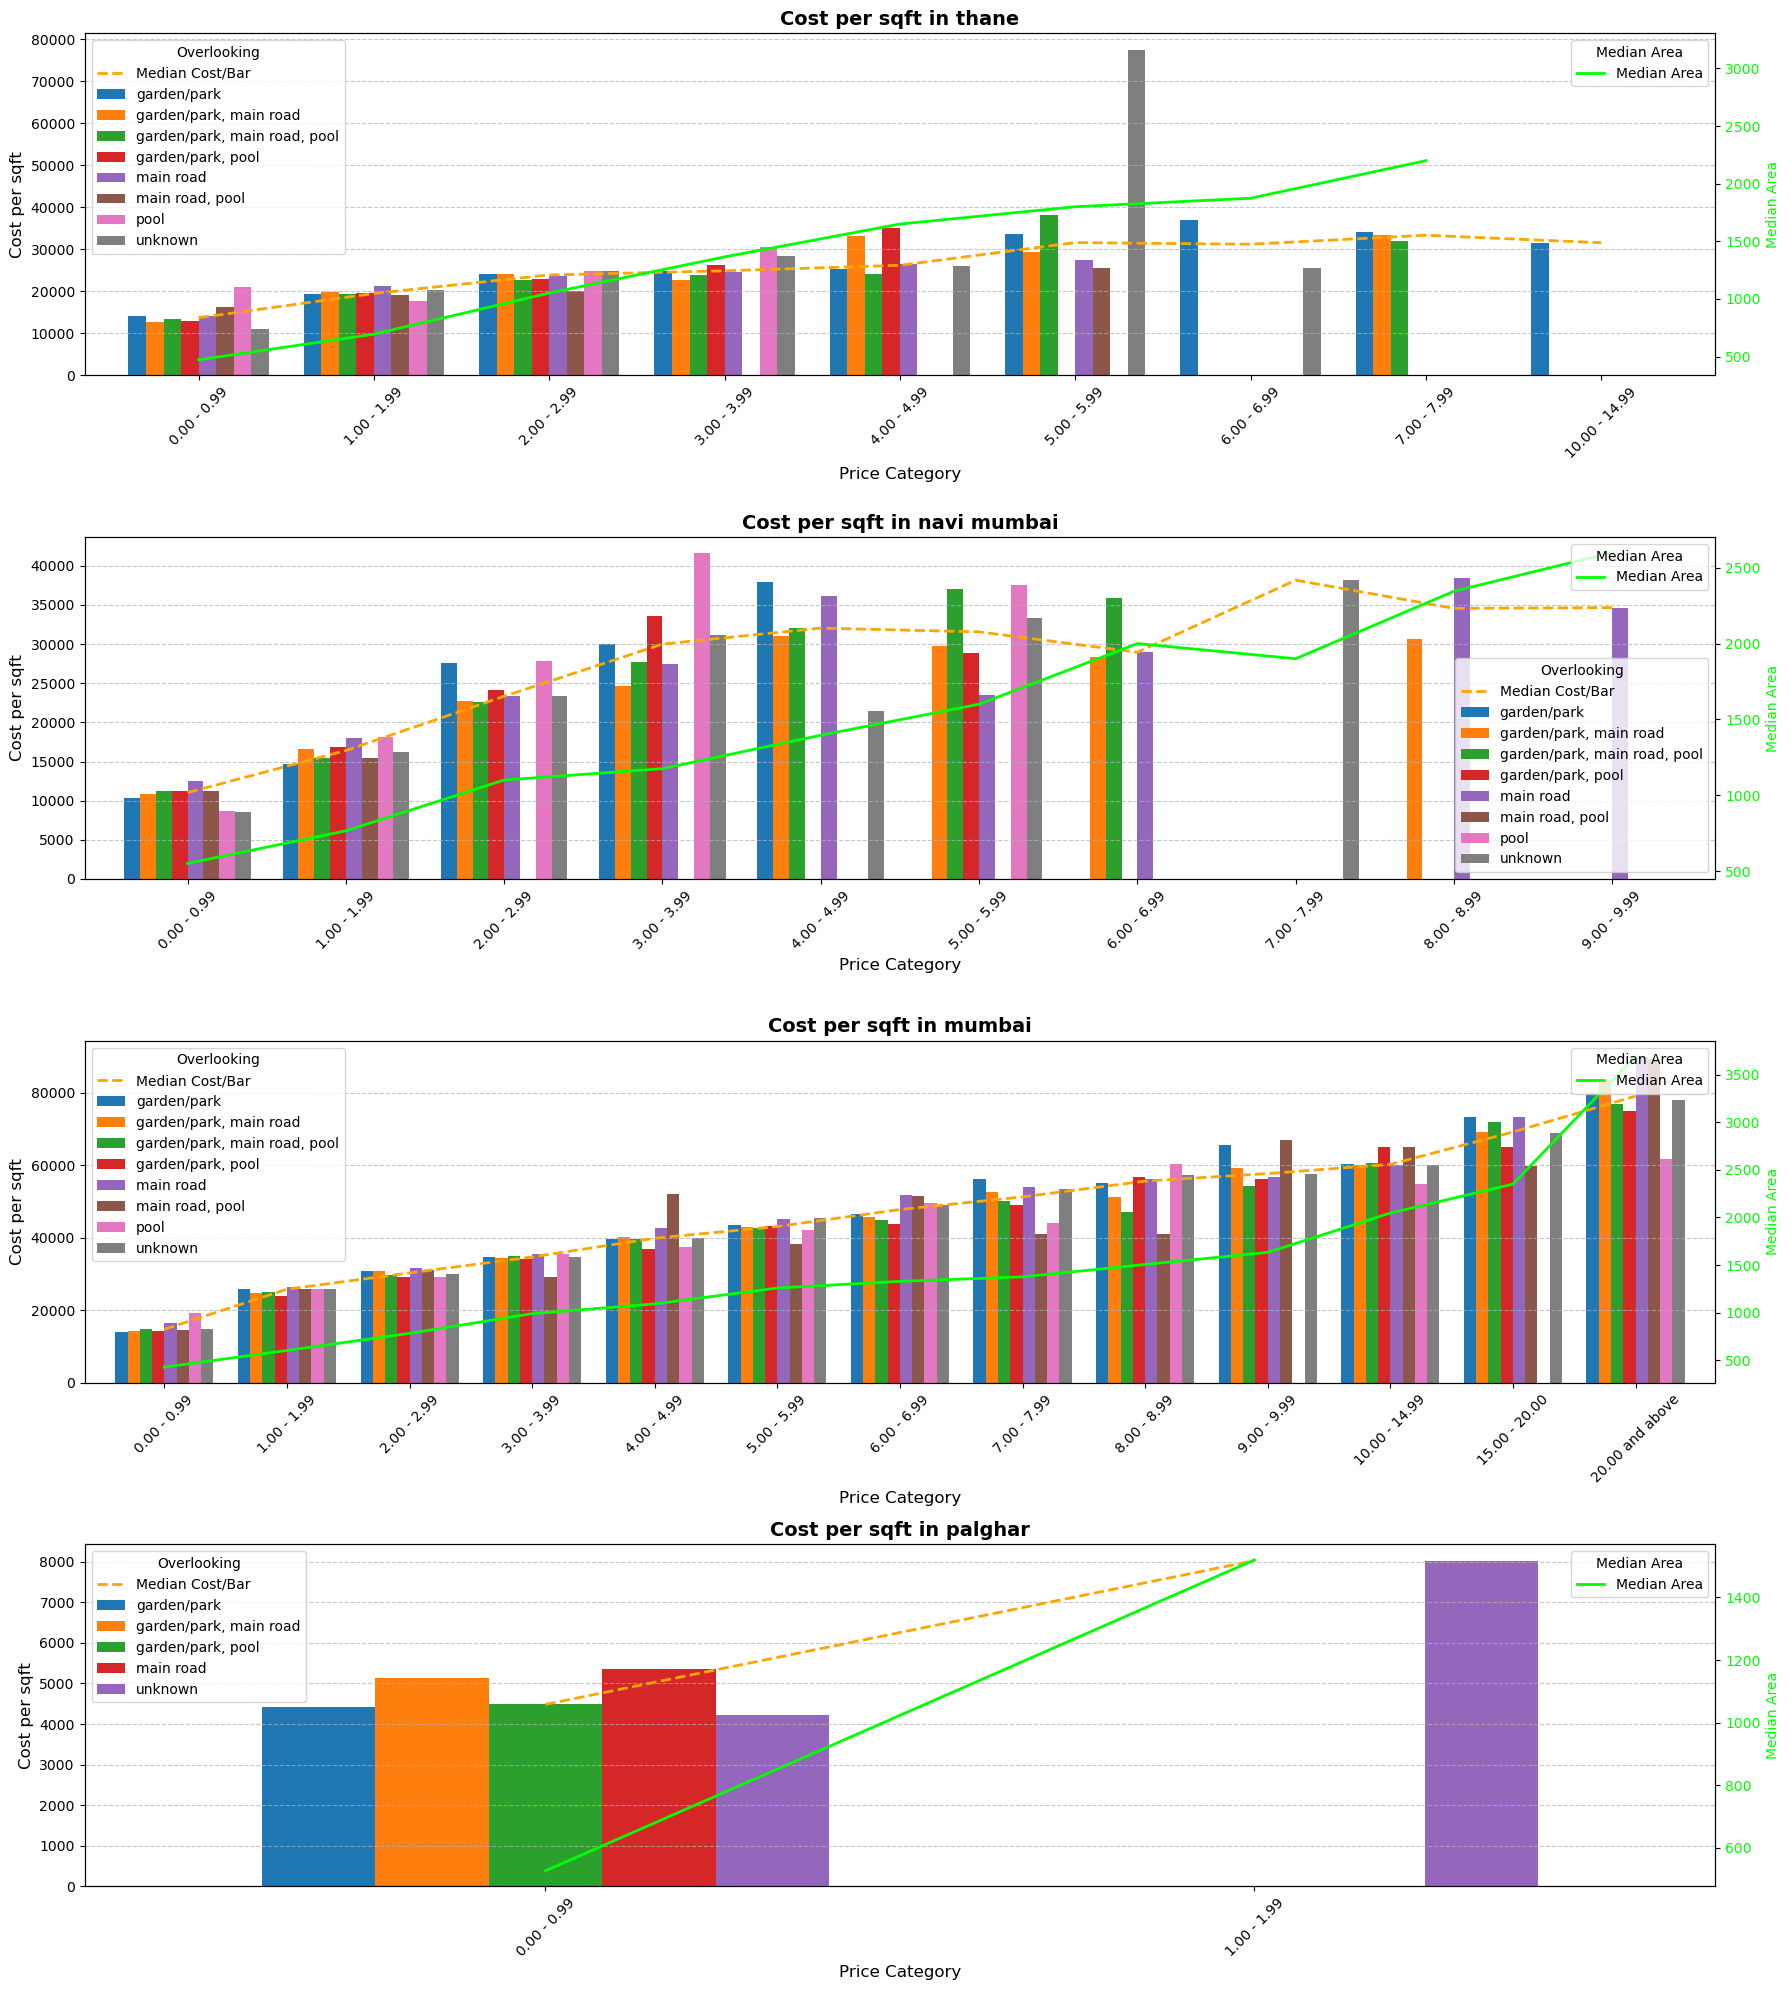

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define unique address regions
address_regions = df["addressregion"].unique()

# Set up subplots (one below the other)
fig, axes = plt.subplots(nrows=len(address_regions), ncols=1, figsize=(18, 5 * len(address_regions)))

# Define distinct colors
colors = sns.color_palette("tab10", n_colors=len(df["overlooking"].unique()))

# Plot for each address region
for i, region in enumerate(address_regions):
    region_df = df[df["addressregion"] == region]  # Filter data for the region
    
    # Create the pivot table with price_category on columns and overlooking on index
    pivot_df = region_df.pivot_table(
        index="price_category", columns="overlooking", values="costpersqft", aggfunc="median"
    )  # 'price_category' on x-axis

    # Plot the bar plot on the left y-axis
    pivot_df.plot(kind="bar", ax=axes[i], color=colors, width=0.8)
    
    # Create a second y-axis to plot only the median area
    ax2 = axes[i].twinx()
    
    # Add the median area line
    area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
    area_data.plot(kind='line', ax=ax2, color='lime', linewidth=2, label='Median Area')
    
    # Calculate the median of medians for each bar (overlooking categories)
    bar_medians = pivot_df.median(axis=1)  # Median across "overlooking" categories
    
    # Plot another line (representing bar medians) on the same axis as the bars
    bar_medians.plot(
        kind='line', ax=axes[i], color='orange', linewidth=2, linestyle='--', label='Median Cost/Bar'
    )
    
    # Customize the plot
    axes[i].set_title(f"Cost per sqft in {region}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Price Category", fontsize=12)
    axes[i].set_ylabel("Cost per sqft", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(title="Overlooking")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # Customize the second y-axis (right side)
    ax2.set_ylabel('Median Area', color='lime')
    ax2.tick_params(axis='y', labelcolor='lime')
    ax2.legend(loc="upper right", title="Median Area")

# Adjust layout
plt.tight_layout()
plt.show()


In [455]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
percentiles = df.groupby("overlooking")["price"].quantile([0.25, 0.75]).unstack()

# Rename the columns correctly
percentiles.columns = ["Q1 (25th Percentile)", "Q3 (75th Percentile)"]

# Compute IQR
percentiles["IQR"] = percentiles["Q3 (75th Percentile)"] - percentiles["Q1 (25th Percentile)"]

# Compute Upper Whisker
percentiles["Upper Whisker"] = percentiles["Q3 (75th Percentile)"] + (1.5 * percentiles["IQR"])

# Display the result
print(percentiles[["Q1 (25th Percentile)", "Q3 (75th Percentile)", "Upper Whisker"]])


                              Q1 (25th Percentile)  Q3 (75th Percentile)  \
overlooking                                                                
garden/park                                   1.15                3.7500   
garden/park, main road                        0.90                3.0000   
garden/park, main road, pool                  1.27                4.0400   
garden/park, pool                             1.70                5.3000   
main road                                     0.99                3.0000   
main road, pool                               1.41                5.4250   
pool                                          1.85                5.6125   

                              Upper Whisker  
overlooking                                  
garden/park                         7.65000  
garden/park, main road              6.15000  
garden/park, main road, pool        8.19500  
garden/park, pool                  10.70000  
main road                           6.0

### Observation  
- Property price increases due to overlooking features: Pool > Garden/Park > Main Road.  
- Most properties are in Mumbai > Thane & Navi Mumbai > Palghar.  
- Assign weightage to the overlooking column based on address region, as property prices vary by region. (given in method3 : actual weightage)

## method 1: assign weightage 

In [456]:
df['overlooking'].isna().sum()

3969

In [457]:
df['overlooking'].value_counts()

overlooking
main road                       2242
garden/park, main road          1790
garden/park, main road, pool    1749
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64

In [458]:
df['overlooking'] = df['overlooking'].fillna('unknown')

In [459]:
# Define the weightage for each flooring type
weightages = {
    "main road": 5,
    "garden/park": 8,
    "pool": 9
}


# Function to calculate the combination score
def calculate_combination_score(overlooking_combination):
    overlooking_types = [f.strip().lower() for f in overlooking_combination.split(",")]
    total_weight = sum(weightages.get(f, 0) for f in overlooking_types)
    #combination_score = total_weight / len(overlooking_types)
    return round(total_weight, 2)

# Apply the function to the dataframe
df["assigned_overlooking_score"] = df["overlooking"].apply(calculate_combination_score)

In [460]:
df[['overlooking',"assigned_overlooking_score"]].sample(10)

overlooking  assigned_overlooking_score
10989                       unknown                           0
383                       main road                           5
2763   garden/park, main road, pool                          22
3554         garden/park, main road                          13
3121   garden/park, main road, pool                          22
240               garden/park, pool                          17
3459         garden/park, main road                          13
6201   garden/park, main road, pool                          22
6082                    garden/park                           8
1715                        unknown                           0

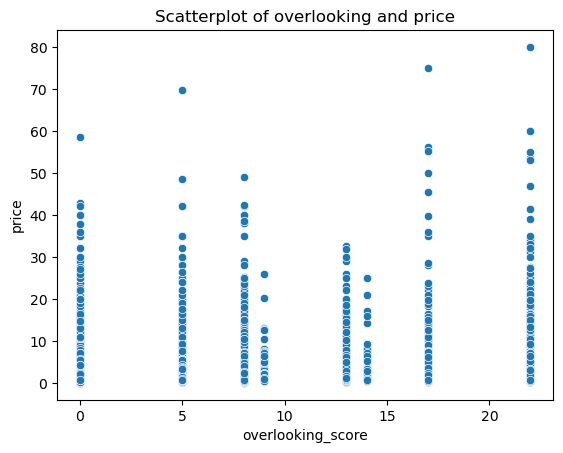

In [461]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['assigned_overlooking_score'], y=df['price'])

# Add labels and title
plt.xlabel('overlooking_score')
plt.ylabel('price')
plt.title('Scatterplot of overlooking and price')
#plt.legend(title='Address Region')
plt.show()

In [462]:
df[df['assigned_overlooking_score'] == 0].shape

(3969, 51)

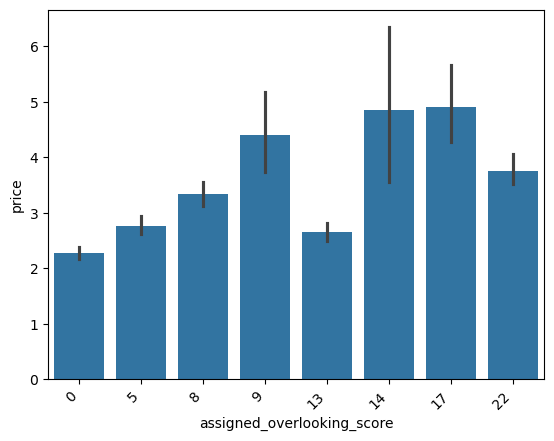

In [463]:
# using price mean 
sns.barplot(data=df, x='assigned_overlooking_score', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

## method 2 : OHE 

In [464]:
# Perform One-Hot Encoding
overlooking_ohe = df['overlooking'].str.get_dummies(sep=', ')

# Concatenate OHE result with the original DataFrame
df = pd.concat([df, overlooking_ohe], axis=1)

In [465]:
df[['overlooking','main road', 'garden/park', 'pool']].sample(10)

overlooking  main road  garden/park  pool
2910                      main road          1            0     0
11167                     main road          1            0     0
3930                           pool          0            0     1
11257                       unknown          0            0     0
11806        garden/park, main road          1            1     0
6192              garden/park, pool          0            1     1
5221   garden/park, main road, pool          1            1     1
1297                    garden/park          0            1     0
9707                        unknown          0            0     0
4813                      main road          1            0     0

## method 3: actual weighatage 

## note : use this method only after this structure 
so before using below code make sure that this steps are compulsory you have to do then use below code 

1. Handle Missing Values (e.g., SimpleImputer, KNNImputer, or domain-specific methods)
2. Apply Train-CV-Test Split then Compute Weightage for Overlooking (using the training set) then Use Weightage in CV and Test Sets (for this code is below)
3. Proceed with Model Training & Evaluation

### I've structured the code like this
1. **Train-test split per `addressregion`**.
2. **Group the train data by `addressregion`**.
3. **Calculate weightages per region based on the training data**.
4. **Apply these weightages to both the train and test sets**.

In [466]:
df['overlooking'].value_counts()

overlooking
unknown                         3969
main road                       2242
garden/park, main road          1790
garden/park, main road, pool    1749
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64

In [467]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to check if a property has a view
def has_overlooking_view(view):
    return view != 'unknown' and view != 'none of these'

# Sample data (assuming df is already loaded)
df['has_overlooking_view'] = df['overlooking'].apply(has_overlooking_view)

# Split data by address region
regions = ['mumbai', 'navi mumbai', 'thane', 'palghar']
region_dfs = {region: df[df['addressregion'] == region] for region in regions}

# Function to calculate weightages per region
def calculate_region_weightages(region_df):
    avg_price_with_overlook = region_df[region_df['has_overlooking_view']]['price'].mean()
    avg_price_without_overlook = region_df[~region_df['has_overlooking_view']]['price'].mean()
    
    # Analyze impact of each overlooking view type
    region_expanded = region_df.copy()
    region_expanded = region_expanded.assign(overlooking=region_expanded.overlooking.str.split(', ')).explode('overlooking')
    
    impact = region_expanded.groupby('overlooking')['price'].mean() - avg_price_without_overlook
    percentage_impact = (impact / avg_price_without_overlook) * 100
    
    def assign_weightage(percentage):
        return round(max(0, (percentage / percentage_impact.max()) * 10), 1)  # Normalize to 10
    
    # Train-test split
    train_df, test_df = train_test_split(region_df, test_size=0.2, random_state=42)
    
    # Train weightages
    train_expanded = train_df.copy()
    train_expanded = train_expanded.assign(overlooking=train_expanded.overlooking.str.split(', ')).explode('overlooking')
    
    impact_train = train_expanded.groupby('overlooking')['price'].mean() - avg_price_without_overlook
    percentage_impact_train = (impact_train / avg_price_without_overlook) * 100
    weightage_train = percentage_impact_train.apply(assign_weightage)
    
    # Function to calculate combined weightage
    def calculate_combined_weightage(overlooking, weightage_train):
        return sum(weightage_train.get(look, 0) for look in overlooking.split(', ') if look not in ['unknown', 'none of these'])
    
    # Apply weightage to train and test data
    train_df['weightage'] = train_df['overlooking'].apply(lambda x: calculate_combined_weightage(x, weightage_train))
    test_df['weightage'] = test_df['overlooking'].apply(lambda x: calculate_combined_weightage(x, weightage_train))
    
    return avg_price_with_overlook, avg_price_without_overlook, weightage_train, train_df, test_df

# Process each region
results = {region: calculate_region_weightages(region_dfs[region]) for region in regions}

# Display results
for region, (avg_price_with_overlook, avg_price_without_overlook, weightage_train, train_df, test_df) in results.items():
    print(f"Region: {region}")
    print("Average price with overlooking view:", avg_price_with_overlook)
    print("Average price without overlooking view:", avg_price_without_overlook)
    print("Weightage per overlooking view type (train data):")
    print(weightage_train)
    print("Train data with corrected weightages:")
    print(train_df[['overlooking', 'weightage']].head())
    print("Test data with corrected weightages:")
    print(test_df[['overlooking', 'weightage']].head())

Region: mumbai
Average price with overlooking view: 3.840548600508906
Average price without overlooking view: 2.8940727065093266
Weightage per overlooking view type (train data):
overlooking
garden/park     5.5
main road       3.6
pool           10.1
unknown         0.0
Name: price, dtype: float64
Train data with corrected weightages:
                 overlooking  weightage
699                  unknown        0.0
6533               main road        3.6
981                  unknown        0.0
9301  garden/park, main road        9.1
3222             garden/park        5.5
Test data with corrected weightages:
       overlooking  weightage
10284      unknown        0.0
10238      unknown        0.0
3548   garden/park        5.5
1541       unknown        0.0
1096       unknown        0.0
Region: navi mumbai
Average price with overlooking view: 1.3937418335089569
Average price without overlooking view: 1.070663594470046
Weightage per overlooking view type (train data):
overlooking
garden/par

### observation  
- Performed 3 different methods to convert the overlooking column into numerical form:  
  - Method 1 : Assign weightage  
  - Method 2 : One-Hot Encoding (OHE)  
  - Method 3 : Actual weightage  
- Evaluate which method gives the best model performance and keep that as the final approach.

# extra_room

In [468]:
df['extra_rooms'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: extra_rooms, dtype: object

In [469]:
df['extra_rooms'].value_counts()

extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

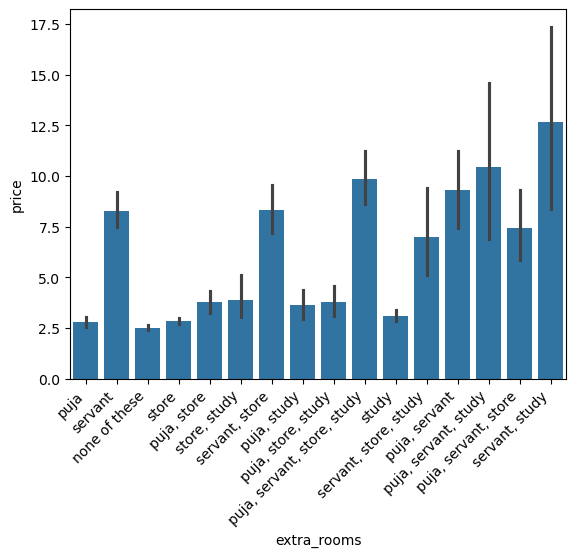

In [470]:
# using price mean 
sns.barplot(data=df, x='extra_rooms', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [471]:
# Create a pivot table to show the average price for each extra_rooms category
pivot_table = df.pivot_table(values='price', index='extra_rooms', aggfunc='mean')

# Display the pivot table
print(pivot_table)

                                 price
extra_rooms                           
none of these                 2.515480
puja                          2.800394
puja, servant                 9.297143
puja, servant, store          7.441964
puja, servant, store, study   9.874494
puja, servant, study         10.461250
puja, store                   3.760900
puja, store, study            3.772985
puja, study                   3.641221
servant                       8.298986
servant, store                8.340233
servant, store, study         6.977931
servant, study               12.658458
store                         2.852927
store, study                  3.906180
study                         3.107129


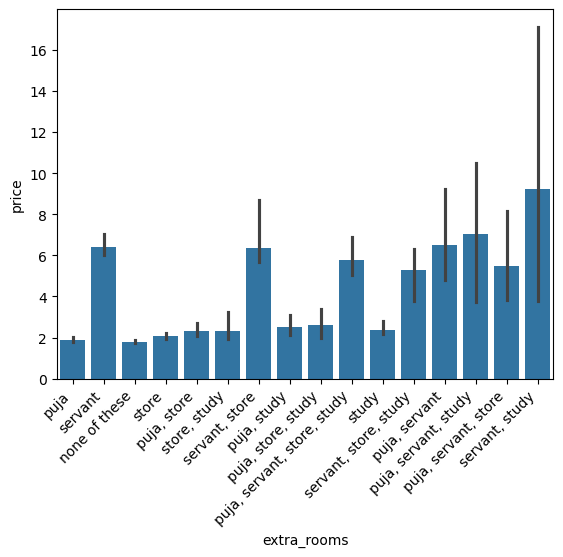

In [472]:
#using price median 
sns.barplot(data=df, x='extra_rooms', y='price',estimator = np.median)
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

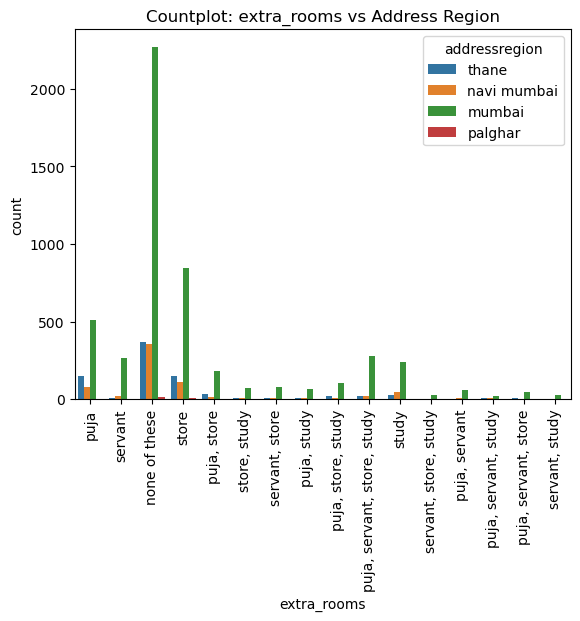

In [473]:
sns.countplot(x='extra_rooms', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Countplot: extra_rooms vs Address Region")
plt.show()

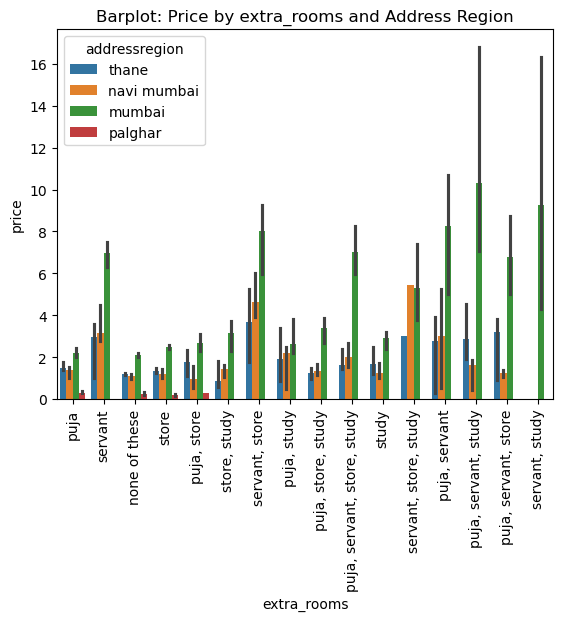

In [474]:
sns.barplot(x='extra_rooms', y='price', hue='addressregion', estimator=np.median , data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by extra_rooms and Address Region")
plt.show()

In [475]:
# Create a pivot table to show the average price for each combination of extra_rooms category and address region
pivot_table = df.pivot_table(values=['price','area'], index='extra_rooms', columns='addressregion', aggfunc='median')

# Display the pivot table
print(pivot_table)

                               area                               price  \
addressregion                mumbai navi mumbai palghar   thane  mumbai   
extra_rooms                                                               
none of these                 720.0       700.0   477.5   653.0   2.100   
puja                          746.0       780.0   820.0   750.0   2.200   
puja, servant                1612.0      1000.0     NaN  1500.0   8.250   
puja, servant, store         1600.0       715.0     NaN  1345.0   6.800   
puja, servant, store, study  1550.0      1100.0     NaN   805.0   7.000   
puja, servant, study         1872.0       740.0     NaN  1233.0  10.300   
puja, store                   877.0       767.5   428.0   897.5   2.685   
puja, store, study            975.0       780.0     NaN   710.0   3.400   
puja, study                   925.5      1000.0     NaN   950.0   2.640   
servant                      1476.0      1219.0     NaN  1111.5   6.950   
servant, store           

In [476]:
df11 = df.groupby(['extra_rooms','addressregion'])[['price','area']].median()
print(df11)

                                             price    area
extra_rooms                 addressregion                 
none of these               mumbai          2.1000   720.0
                            navi mumbai     1.0800   700.0
                            palghar         0.2585   477.5
                            thane           1.2000   653.0
puja                        mumbai          2.2000   746.0
                            navi mumbai     1.3800   780.0
                            palghar         0.3100   820.0
                            thane           1.5000   750.0
puja, servant               mumbai          8.2500  1612.0
                            navi mumbai     3.0050  1000.0
                            thane           2.7600  1500.0
puja, servant, store        mumbai          6.8000  1600.0
                            navi mumbai     1.2250   715.0
                            thane           3.2100  1345.0
puja, servant, store, study mumbai          7.0000  1550

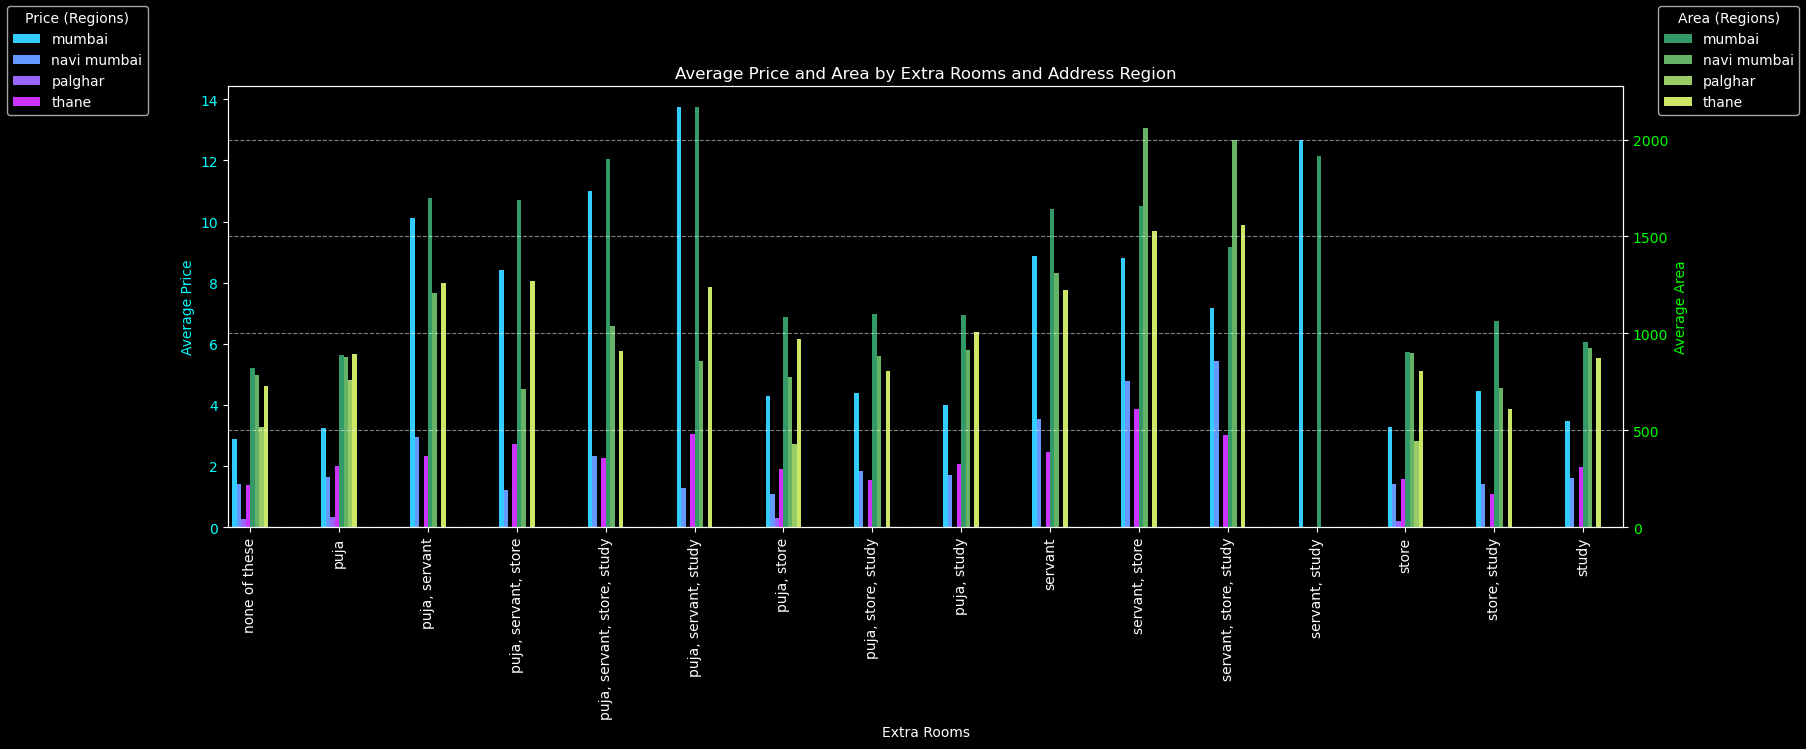

In [477]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply dark theme
plt.style.use('dark_background')

# Create pivot table
pivot_table = df.pivot_table(values=['price', 'area'], index='extra_rooms', columns='addressregion', aggfunc='mean')

# Define color palettes
price_colors = sns.color_palette("cool", n_colors=pivot_table['price'].shape[1])
area_colors = sns.color_palette("summer", n_colors=pivot_table['area'].shape[1])

# Plot the pivot table with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 7))  # Increase figure width

# Plot price on the first y-axis
price_bars = pivot_table['price'].plot(kind='bar', ax=ax1, position=1, width=0.2, color=price_colors, legend=False)
ax1.set_xlabel('Extra Rooms')
ax1.set_ylabel('Average Price', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')

# Create a second y-axis to plot area
ax2 = ax1.twinx()
area_bars = pivot_table['area'].plot(kind='bar', ax=ax2, position=0, width=0.2, color=area_colors, legend=False)
ax2.set_ylabel('Average Area', color='lime')
ax2.tick_params(axis='y', labelcolor='lime')

# Adding legends manually
price_handles, price_labels = ax1.get_legend_handles_labels()
area_handles, area_labels = ax2.get_legend_handles_labels()

fig.legend(price_handles, price_labels, loc="upper left", title="Price (Regions)")
fig.legend(area_handles, area_labels, loc="upper right", title="Area (Regions)")

# Customize the plot
plt.title('Average Price and Area by Extra Rooms and Address Region')
plt.xticks(rotation=45)

# Add more space between x-axis labels and adjust layout
plt.subplots_adjust(bottom=0.25, hspace=0.5, wspace=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


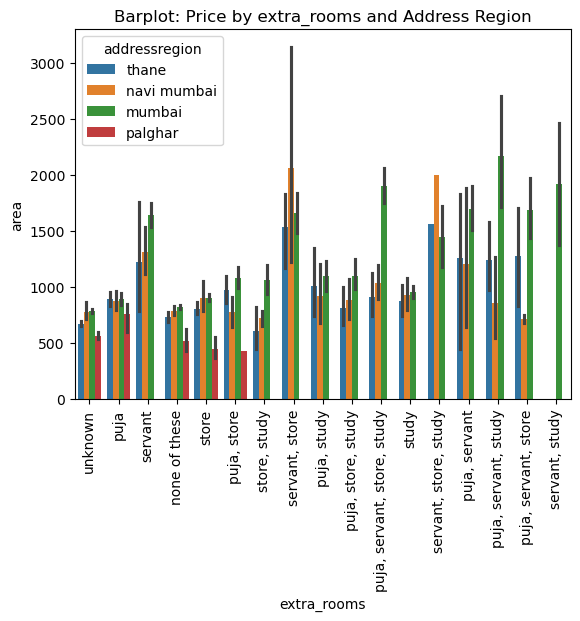

In [492]:
plt.style.use('default')
sns.barplot(x='extra_rooms', y='area', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by extra_rooms and Address Region")
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\640506184.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


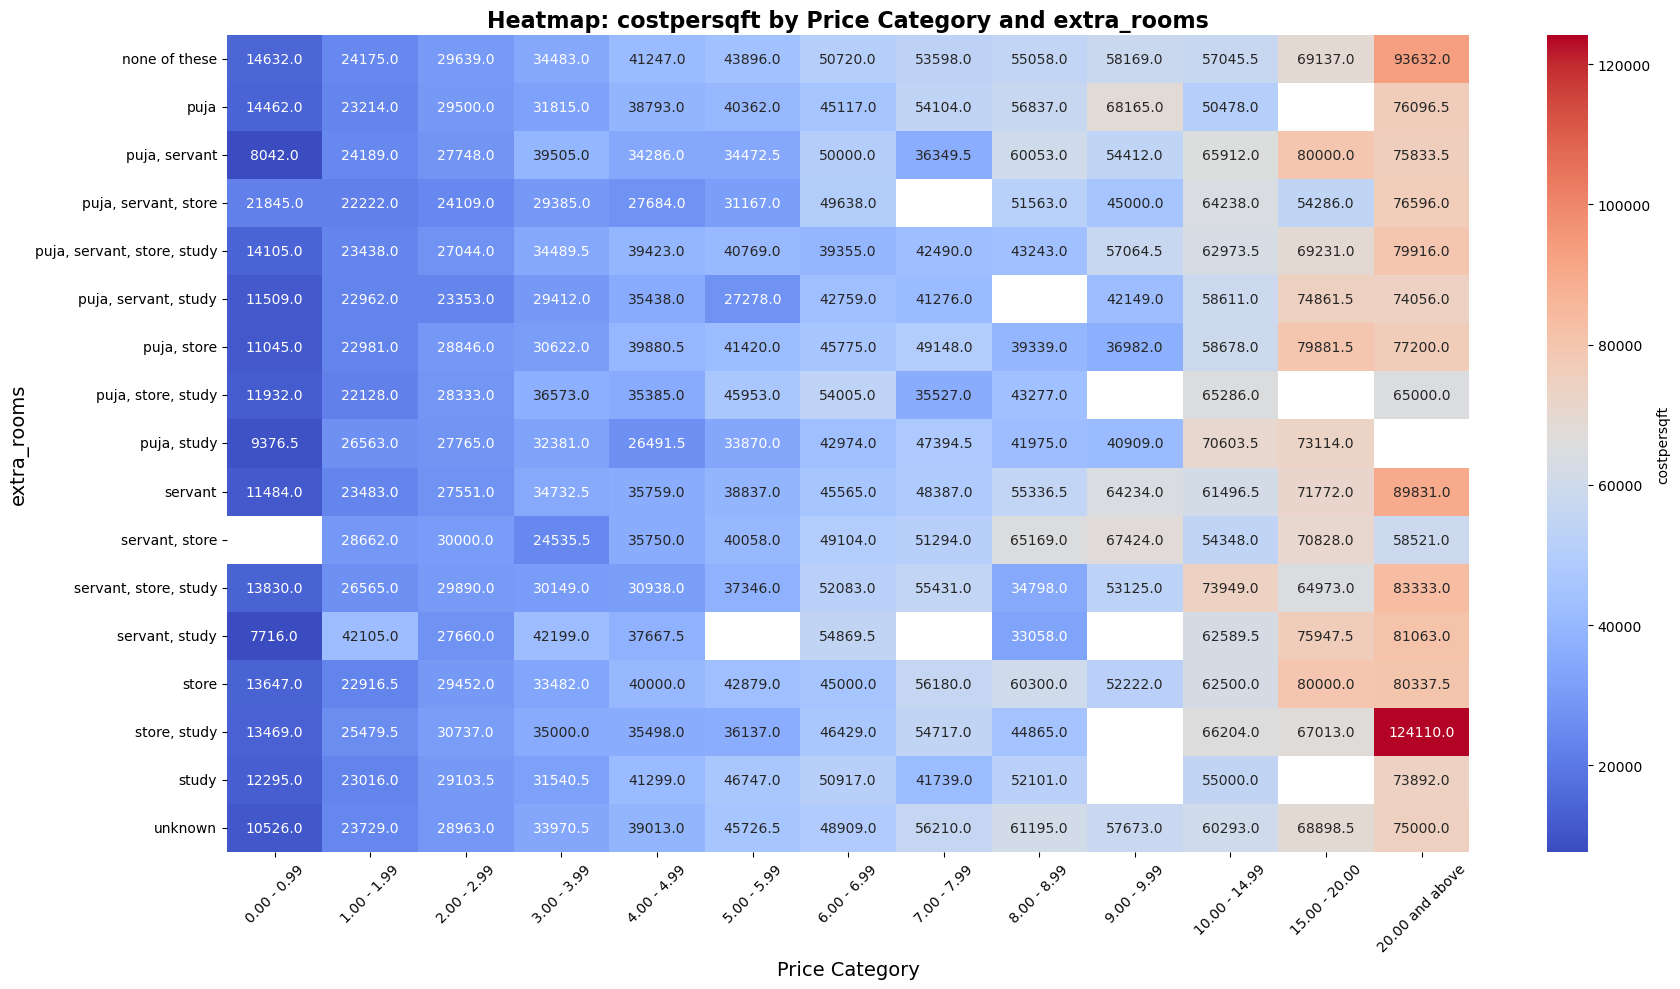

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the correct order for price categories
price_order = [
    "0.00 - 0.99", "1.00 - 1.99", "2.00 - 2.99", "3.00 - 3.99", "4.00 - 4.99",
    "5.00 - 5.99", "6.00 - 6.99", "7.00 - 7.99", "8.00 - 8.99", "9.00 - 9.99",
    "10.00 - 14.99", "15.00 - 20.00", "20.00 and above"
]

# Convert 'price_category' into ordered categorical type
df['price_category'] = pd.Categorical(df['price_category'], categories=price_order, ordered=True)

# Create pivot table
pivot_df = df.pivot_table(
    index='extra_rooms', 
    columns='price_category', 
    values='costpersqft', 
    aggfunc='median'
)

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'costpersqft'})

# Add labels and title
plt.title("Heatmap: costpersqft by Price Category and extra_rooms", fontsize=16, weight='bold')
plt.xlabel("Price Category", fontsize=14)
plt.ylabel("extra_rooms", fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

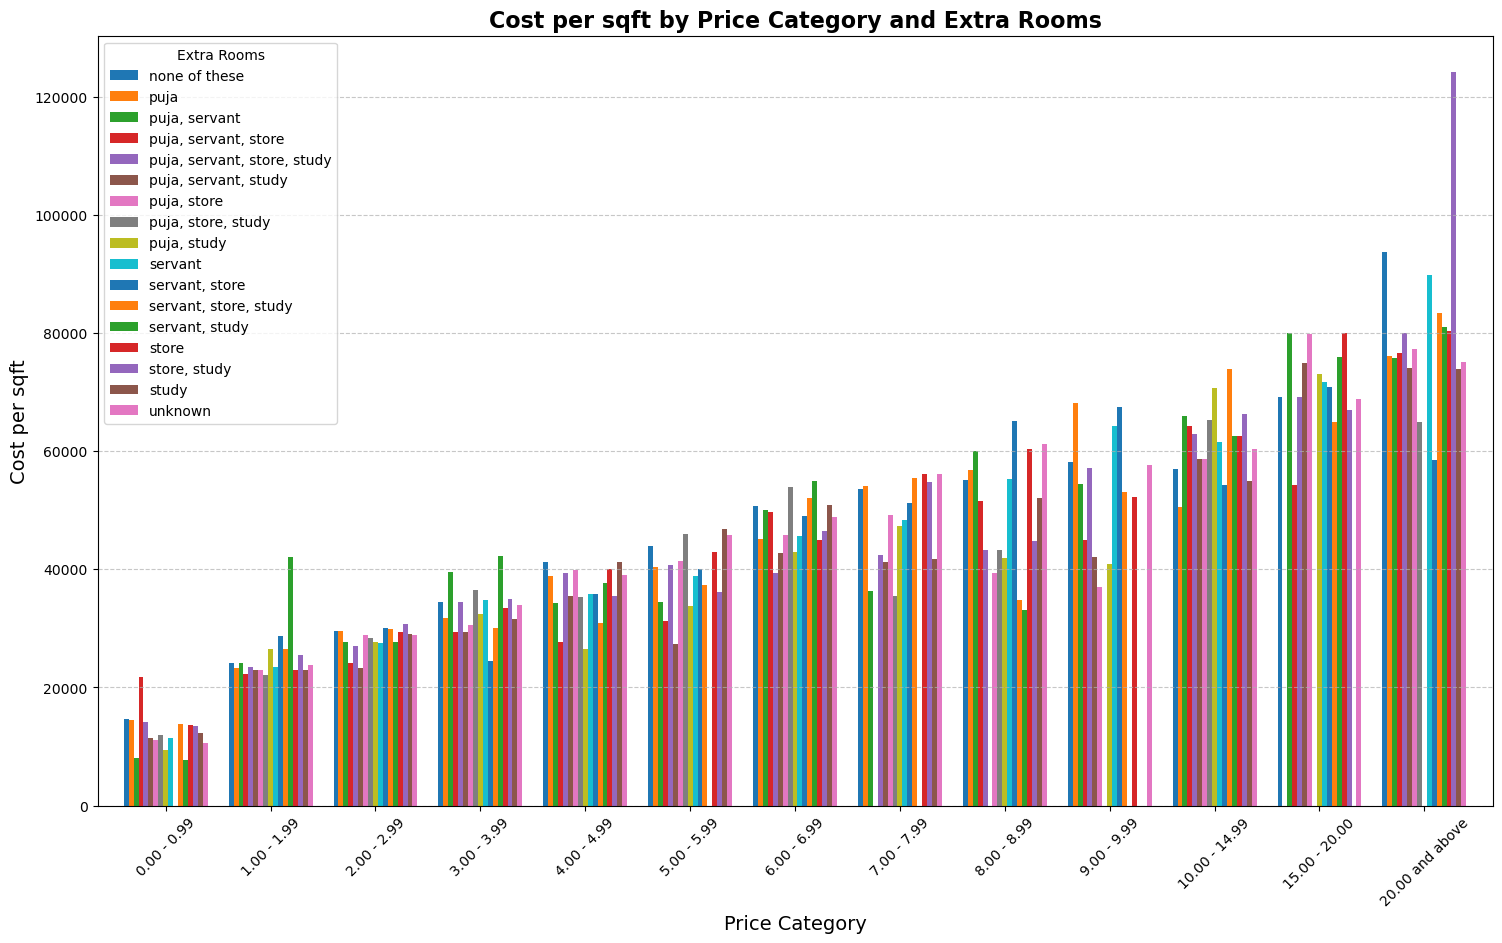

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# Generate distinct colors
colors = sns.color_palette("tab10", n_colors=len(pivot_df))

# Plot with different colors for each "extra_rooms" category
pivot_df.T.plot(kind='bar', figsize=(18, 10), color=colors, width=0.8)

plt.title("Cost per sqft by Price Category and Extra Rooms", fontsize=16, weight='bold')
plt.xlabel("Price Category", fontsize=14)
plt.ylabel("Cost per sqft", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Extra Rooms")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\964501881.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = region_df.pivot_table(
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\964501881.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
C:\Users\ABC\AppData\Local\Temp\ipykernel_13876\964501881.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = regi

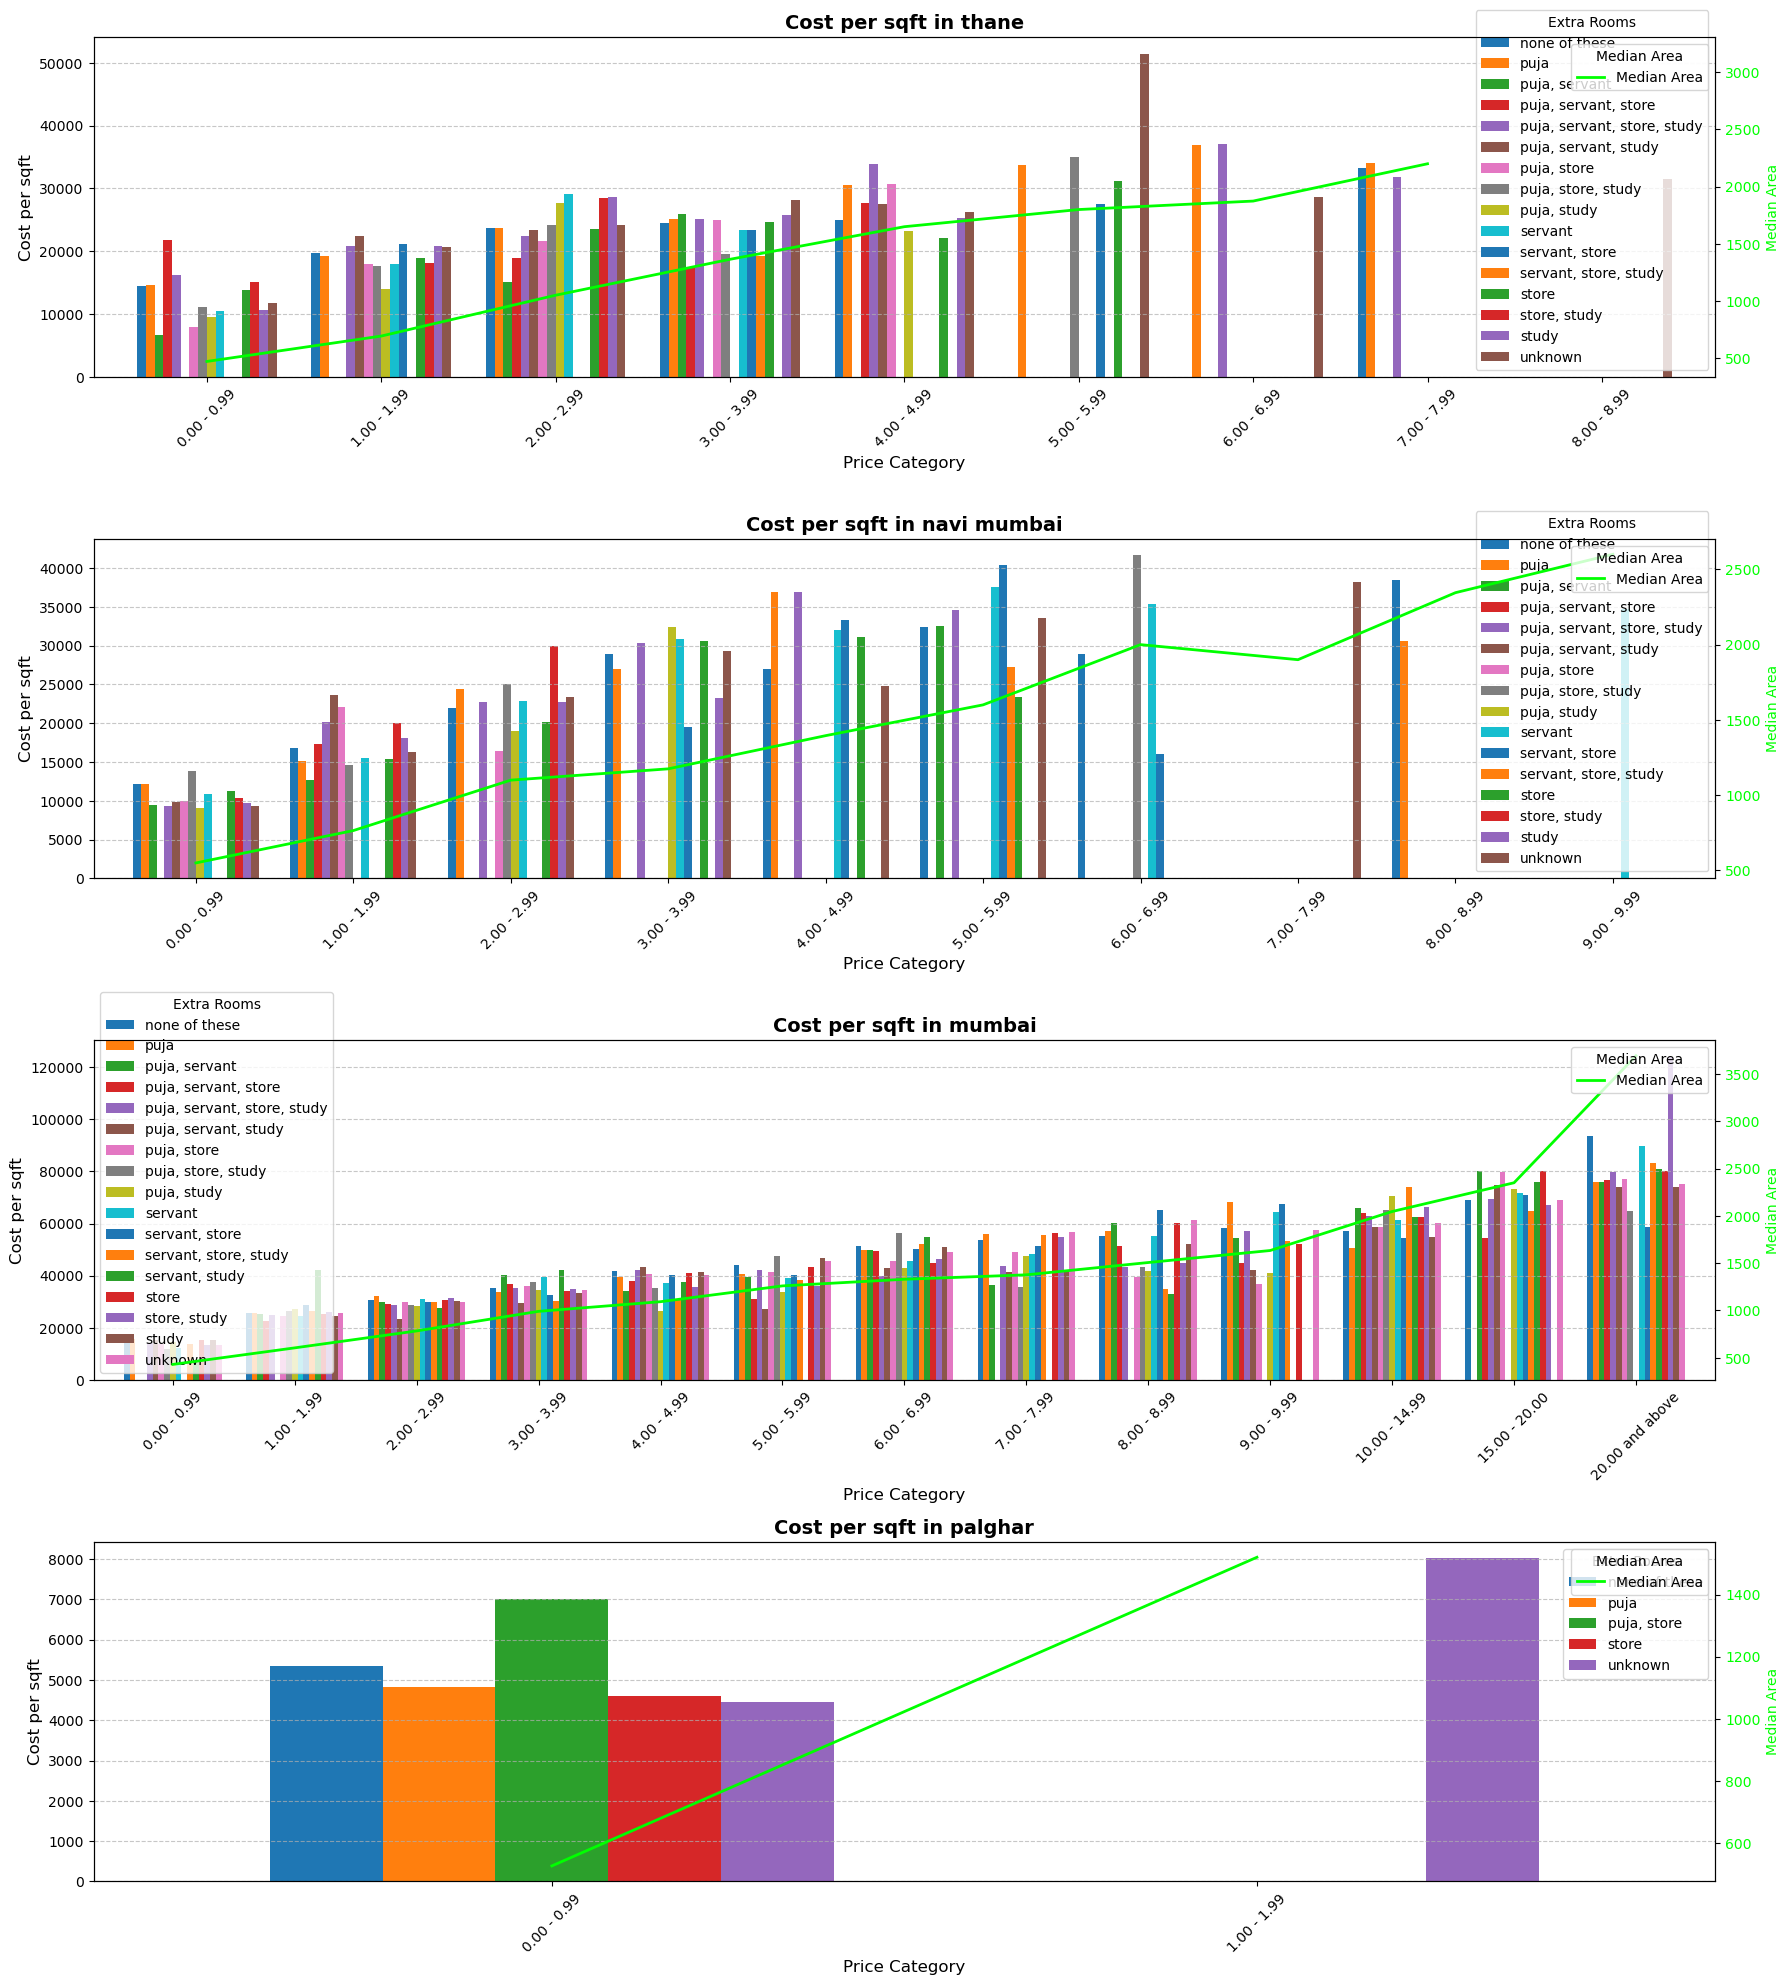

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define unique address regions
address_regions = df["addressregion"].unique()

# Set up subplots (one below the other)
fig, axes = plt.subplots(nrows=len(address_regions), ncols=1, figsize=(18, 5 * len(address_regions)))

# Define distinct colors
colors = sns.color_palette("tab10", n_colors=len(df["extra_rooms"].unique()))

# Plot for each address region
for i, region in enumerate(address_regions):
    region_df = df[df["addressregion"] == region]  # Filter data for region
    
    # Create the pivot table with price_category on columns and extra_rooms on index
    pivot_df = region_df.pivot_table(
        index="price_category", columns="extra_rooms", values="costpersqft", aggfunc="median"
    )  # Note the change here: 'price_category' is now on the x-axis
    
    # Plot the bar plot on the left y-axis
    pivot_df.plot(kind="bar", ax=axes[i], color=colors, width=0.8)
    
    # Create a second y-axis to plot area
    ax2 = axes[i].twinx()
    
    # Add area data (for demonstration, using the median cost per sqft for the area as an example)
    area_data = region_df.groupby("price_category")["area"].median()  # Median area by price_category
    area_data.plot(kind='line', ax=ax2, color='lime', linewidth=2, label='Median Area')

    axes[i].set_title(f"Cost per sqft in {region}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Price Category", fontsize=12)
    axes[i].set_ylabel("Cost per sqft", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(title="Extra Rooms")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # Customize the second y-axis (right side)
    ax2.set_ylabel('Median Area', color='lime')
    ax2.tick_params(axis='y', labelcolor='lime')
    ax2.legend(loc="upper right", title="Median Area")

# Adjust layout
plt.tight_layout()
plt.show()


### observation 
- as price increases then the median area and area of the flats also increases 
- There are some flats even there costpersqft and area is same then also one flat have puja,servant room and another flat have only servant room
  eg: mumbai , 3to 4 cr flats 

In [479]:
# Create a pivot table to show the average price for each combination of extra_rooms category and address region
pivot_table = df.pivot_table(values='area', index='extra_rooms', columns='addressregion', aggfunc='mean')

# Display the pivot table
print(pivot_table)

addressregion                     mumbai  navi mumbai     palghar        thane
extra_rooms                                                                   
none of these                 819.724670   786.378151  517.000000   730.068493
puja                          888.435039   877.827160  756.666667   891.860927
puja, servant                1696.517857  1206.250000         NaN  1258.000000
puja, servant, store         1688.744681   715.000000         NaN  1272.142857
puja, servant, store, study  1902.003636  1036.857143         NaN   909.550000
puja, servant, study         2167.826087   856.200000         NaN  1241.500000
puja, store                  1082.798913   772.666667  428.000000   972.906250
puja, store, study           1100.796117   883.000000         NaN   807.842105
puja, study                  1096.453125   915.714286         NaN  1006.333333
servant                      1641.598485  1310.782609         NaN  1223.375000
servant, store               1657.805195  2062.50000

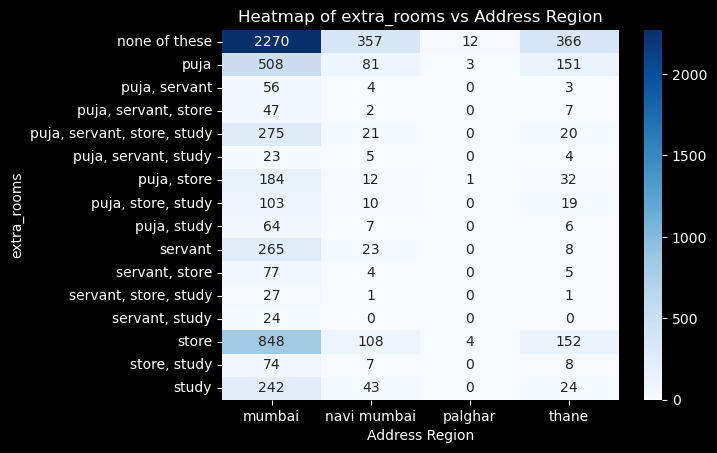

In [480]:
# Create a crosstab
cross_tab = pd.crosstab(df['extra_rooms'], df['addressregion'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of extra_rooms vs Address Region")
plt.xlabel("Address Region")
plt.ylabel("extra_rooms")
plt.show()

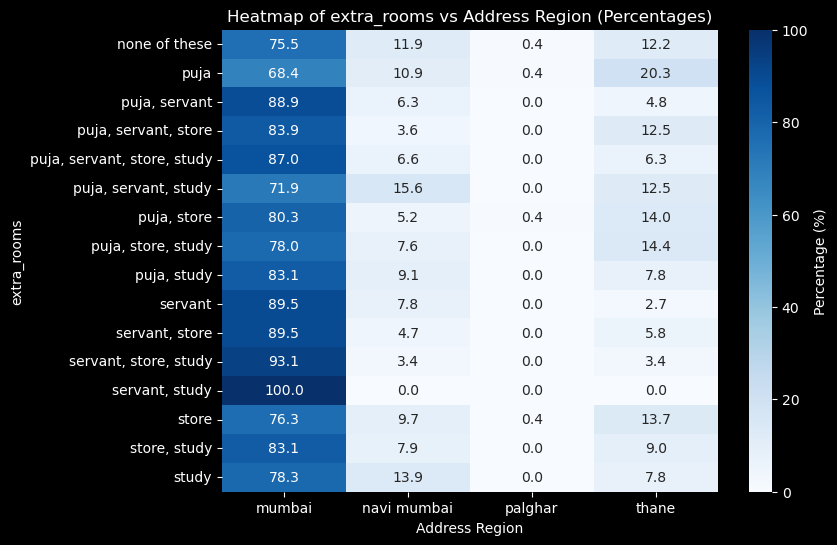

In [481]:
# Create a crosstab of counts
cross_tab = pd.crosstab(df['extra_rooms'], df['addressregion'])

# Normalize the crosstab to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot heatmap with percentages
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(cross_tab_percentage, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title("Heatmap of extra_rooms vs Address Region (Percentages)")
plt.xlabel("Address Region")
plt.ylabel("extra_rooms")
plt.show()

In [482]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
percentiles = df.groupby("extra_rooms")["price"].quantile([0.25, 0.75]).unstack()

# Rename the columns correctly
percentiles.columns = ["Q1 (25th Percentile)", "Q3 (75th Percentile)"]

# Compute IQR
percentiles["IQR"] = percentiles["Q3 (75th Percentile)"] - percentiles["Q1 (25th Percentile)"]

# Compute Upper Whisker
percentiles["Upper Whisker"] = percentiles["Q3 (75th Percentile)"] + (1.5 * percentiles["IQR"])

# Display the result
print(percentiles[["Q1 (25th Percentile)", "Q3 (75th Percentile)", "Upper Whisker"]])


                             Q1 (25th Percentile)  Q3 (75th Percentile)  \
extra_rooms                                                               
none of these                              1.0800                2.9600   
puja                                       1.1500                3.2600   
puja, servant                              3.5000               13.6250   
puja, servant, store                       2.4750                9.0250   
puja, servant, store, study                2.5000               13.5350   
puja, servant, study                       2.7250               11.8875   
puja, store                                1.4000                4.5000   
puja, store, study                         1.3000                4.9925   
puja, study                                1.8000                4.0600   
servant                                    3.8875               10.0225   
servant, store                             3.9250               11.5000   
servant, store, study    

## method 1: actual weightage

## note : use this method only after this structure 
so before using below code make sure that this steps are compulsory you have to do then use below code 

1. Handle Missing Values (e.g., SimpleImputer, KNNImputer, or domain-specific methods)
2. Apply Train-CV-Test Split then Compute Weightage for extra_rooms (using the training set) then Use Weightage in CV and Test Sets (for this code is below)
3. Proceed with Model Training & Evaluation

In [483]:
df['extra_rooms'].isna().sum()

5300

In [484]:
df['extra_rooms'] = df['extra_rooms'].fillna('unknown')

In [485]:
df['extra_rooms'].value_counts().index

Index(['unknown', 'none of these', 'store', 'puja',
       'puja, servant, store, study', 'study', 'servant', 'puja, store',
       'puja, store, study', 'store, study', 'servant, store', 'puja, study',
       'puja, servant', 'puja, servant, store', 'puja, servant, study',
       'servant, store, study', 'servant, study'],
      dtype='object', name='extra_rooms')

### I've structured the code like this
1. **Train-test split per `addressregion`**.
2. **Group the train data by `addressregion`**.
3. **Calculate weightages per region based on the training data**.
4. **Apply these weightages to both the train and test sets**.

In [486]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to check if a property has extra rooms
def has_extra_rooms(rooms):
    return rooms != 'unknown' and rooms != 'none of these'

# Sample data (assuming df is already loaded)
df['has_extra_rooms'] = df['extra_rooms'].apply(has_extra_rooms)

# Split data by address region
regions = ['mumbai', 'navi mumbai', 'thane', 'palghar']
region_dfs = {region: df[df['addressregion'] == region] for region in regions}

# Function to calculate weightages per region
def calculate_region_weightages(region_df):
    avg_price_with_extra = region_df[region_df['has_extra_rooms']]['price'].mean()
    avg_price_without_extra = region_df[~region_df['has_extra_rooms']]['price'].mean()
    
    # Analyze impact of each extra room
    region_expanded = region_df.copy()
    region_expanded = region_expanded.assign(extra_rooms=region_expanded.extra_rooms.str.split(', ')).explode('extra_rooms')
    
    impact = region_expanded.groupby('extra_rooms')['price'].mean() - avg_price_without_extra
    percentage_impact = (impact / avg_price_without_extra) * 100
    
    def assign_weightage(percentage):
        return round(max(0, (percentage / percentage_impact.max()) * 10), 1)  # Normalize to 10
    
    # Train-test split
    train_df, test_df = train_test_split(region_df, test_size=0.2, random_state=42)
    
    # Train weightages
    train_expanded = train_df.copy()
    train_expanded = train_expanded.assign(extra_rooms=train_expanded.extra_rooms.str.split(', ')).explode('extra_rooms')
    
    impact_train = train_expanded.groupby('extra_rooms')['price'].mean() - avg_price_without_extra
    percentage_impact_train = (impact_train / avg_price_without_extra) * 100
    weightage_train = percentage_impact_train.apply(assign_weightage)
    
    # Function to calculate combined weightage
    def calculate_combined_weightage(extra_rooms, weightage_train):
        return sum(weightage_train.get(look, 0) for look in extra_rooms.split(', ') if look not in ['unknown', 'none of these'])
    
    # Apply weightage to train and test data
    train_df['weightage'] = train_df['extra_rooms'].apply(lambda x: calculate_combined_weightage(x, weightage_train))
    test_df['weightage'] = test_df['extra_rooms'].apply(lambda x: calculate_combined_weightage(x, weightage_train))
    
    return avg_price_with_extra, avg_price_without_extra, weightage_train, train_df, test_df

# Process each region
results = {region: calculate_region_weightages(region_dfs[region]) for region in regions}

# Display results
for region, (avg_price_with_extra, avg_price_without_extra, weightage_train, train_df, test_df) in results.items():
    print(f"Region: {region}")
    print("Average price with extra rooms:", avg_price_with_extra)
    print("Average price without extra rooms:", avg_price_without_extra)
    print("Weightage per extra room type (train data):")
    print(weightage_train)
    print("Train data with corrected weightages:")
    print(train_df[['extra_rooms', 'weightage']].head())
    print("Test data with corrected weightages:")
    print(test_df[['extra_rooms', 'weightage']].head())

Region: mumbai
Average price with extra rooms: 5.298921192758254
Average price without extra rooms: 2.684610341805434
Weightage per extra room type (train data):
extra_rooms
none of these     0.3
puja              4.6
servant          10.0
store             3.6
study             6.0
unknown           0.0
Name: price, dtype: float64
Train data with corrected weightages:
        extra_rooms  weightage
699         unknown        0.0
6533  none of these        0.0
981         unknown        0.0
9301  none of these        0.0
3222  none of these        0.0
Test data with corrected weightages:
         extra_rooms  weightage
10284        unknown        0.0
10238        unknown        0.0
3548   none of these        0.0
1541         unknown        0.0
1096         unknown        0.0
Region: navi mumbai
Average price with extra rooms: 1.7814603658536585
Average price without extra rooms: 1.1284150943396227
Weightage per extra room type (train data):
extra_rooms
none of these     1.5
puja      

## method 2 : OHE 

In [487]:
# Perform One-Hot Encoding
extra_rooms_ohe = df['extra_rooms'].str.get_dummies(sep=', ')

# Concatenate OHE result with the original DataFrame
df = pd.concat([df, extra_rooms_ohe], axis=1)

In [488]:
df[['extra_rooms','study', 'servant', 'puja','store']].sample(10)

extra_rooms  study  servant  puja  store
9378         unknown      0        0     0      0
195    none of these      0        0     0      0
6457         unknown      0        0     0      0
11526  none of these      0        0     0      0
2662   none of these      0        0     0      0
4755   none of these      0        0     0      0
8773           store      0        0     0      1
8958         unknown      0        0     0      0
890          unknown      0        0     0      0
10632        unknown      0        0     0      0

### observation  
- Performed 2 different methods to convert the extra_rooms column into numerical form:  
  - Method 1 : Actual weightage  
  - Method 2 : One-Hot Encoding (OHE)    
- Evaluate which method gives the best model performance and keep that as the final approach.

# price with numerical columns

# available_units vs price 

In [489]:
df['price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: price, dtype: float64

<Axes: xlabel='available_units', ylabel='price'>

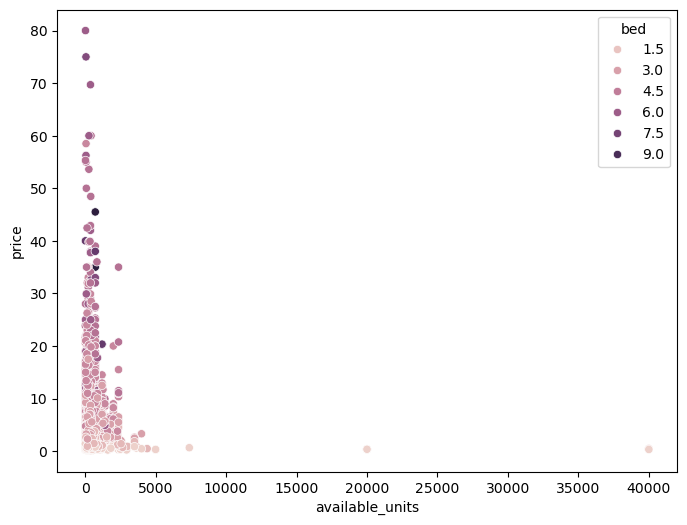

In [493]:
plt.style.use('default')
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['available_units'],y=df['price'],hue=df['bed'])

# observation 
- as price increases then available_units decreases
- most data clustered around low unit availability
- few outliers have very high available_units
- higher bed counts (darker colors) are generally associated with higher prices, while properties with lower bed counts (lighter colors) tend to have lower prices.

# assigned_amenities_score

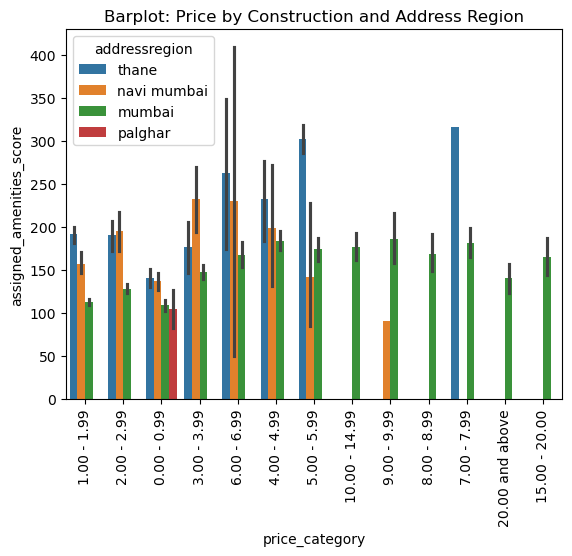

In [494]:
sns.barplot(x='price_category', y='assigned_amenities_score',hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()